# Prevendo ***Customer Churn*** em Operadoras de Telecomunicações

## **1. Descrição do Problema**

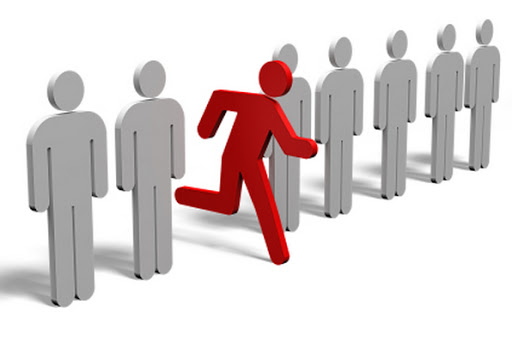

**Customer Churn** (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial.  

Entender por que os clientes abandonam o seu produto ou serviço é vital para conquistar um crescimento sustentável. Como o Churn tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios.  

Hoje, especialmente com o crescimento de modelos de negócios por assinatura, o modelo SaaS, o Churn () passou a ser mais conhecido. E nesse período de quarentena, as empresas estão com mais dificuldades de fazer a retenção dos seus clientes pagantes.

Portanto, Churn é uma métrica que indica a taxa de clientes perdidos por uma empresa em um determinado período de tempo. Para calcular o churn, basta dividir a quantidade de clientes que cancelaram pelo total de clientes, no período determinado.

A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

### **1.1 Objetivo**

Criar um Modelo de Classificação que possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade disso ocorrer.

Temos aqui um problema de classificação binária representado pela variável **churn**:  

**Yes** - O cliente encerrou o contrato.  
**No** - O cliente não encerrou o contrato.

### **1.2 Descrição das variáveis disponíveis**

Os dados são de uma empresa de telecomunicações dos EUA, não identificada.


**state** - Sigla do estado de residência do cliente nos EUA.  
**account_length** - Tempo de contrato do cliente com a empresa, em meses.  
**area_code** - Código de área da região do cliente.  
**international_plan** - O cliente possui ou não plano internacional (yes/no).  
**voice_mail_plan** - O cliente possui ou não plano de correio de voz (yes/no).  
**number_vmail_messages** - Número de mensagens de correio de voz.  
**total_day_minutes** - Total em minutos de chamadas diurnas.  
**total_day_calls** - Total de chamadas diurnas.  
**total_day_charge** - Cobrança total das chamadas diurnas.  
**total_eve_minutes** - Total em minutos de chamadas noturnas.  
**total_eve_calls** - Total de chamadas noturnas.  
**total_eve_charge** - Cobrança total de chamadas noturnas.  
**total_night_minutes** - Total de minutos de chamadas noturnas.  
**total_night_calls** - Número total de chamadas noturnas.  
**total_night_charge** - Cobrança total das chamadas noturnas.  
**total_intl_minutes** - Total de minutos de chamadas internacionais.  
**total_intl_calls** - Número total de chamadas internacionais.  
**total_intl_charge** - Custo total de chamadas internacionais.  
**number_customer_service_calls** - Número de ligações para atendimento ao cliente.  

**churn** (yes/no) Customer churn - **Variável *Target***

# **2. Carga dos Dados**

## **2.1 Importando Bibliotecas**

In [86]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [844]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as ipw
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    Normalizer,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    cross_val_predict,
    GridSearchCV,
)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    plot_roc_curve,
    precision_score,
    recall_score,
    plot_confusion_matrix,
    precision_recall_curve,
    classification_report,
    RocCurveDisplay,
    auc,
    roc_auc_score,
    PrecisionRecallDisplay,
)
from sklearn.pipeline import Pipeline
import pickle

## **2.2 Carregando os Datasets**

Para esse projeto temos datasets de Treino e Teste previamente separados em dois arquivos .CSV.  

Ambos serão carregados para dataframes do pacote Pandas.

In [88]:
# Carga dos arquivos CSV de treino e teste

dados_treino_original = pd.read_csv("projeto4_telecom_treino.csv", index_col=0)
dados_teste_original = pd.read_csv("projeto4_telecom_teste.csv", index_col=0)

dados_treino_original.reset_index(drop=True, inplace=True)
dados_teste_original.reset_index(drop=True, inplace=True)

Começamos observando o formato dos datasets originais:

**Dataset de Treino:** 3333 observações (linhas) e 20 variáveis (colunas).  

**Dataset de Teste:** 1667 observações (linhas) e 20 variáveis (colunas).

In [89]:
dados_treino_original.shape

(3333, 20)

In [90]:
dados_teste_original.shape

(1667, 20)

**Dados de Treino**

In [91]:
# Amostra das cinco primeiras obervações dos dados de treino

dados_treino_original.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


**Dados de Teste**

In [92]:
# Amostra das cinco primeiras obervações dos dados de teste

dados_teste_original.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


# **3. Análise Exploratória**

Abaixo uma visão geral de como os datasets foram importados.  

O método **info( )** nos dá informações sobre como o interpretador python carregou cada uma das variáveis.  

Traz informações importantes também sobre os valores não nulos em cada uma das variáveis e o espaço ocupado em memória.

**Dados de Treino**

In [93]:
dados_treino_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

**Dados de Teste**

In [94]:
dados_teste_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1667 non-null   object 
 1   account_length                 1667 non-null   int64  
 2   area_code                      1667 non-null   object 
 3   international_plan             1667 non-null   object 
 4   voice_mail_plan                1667 non-null   object 
 5   number_vmail_messages          1667 non-null   int64  
 6   total_day_minutes              1667 non-null   float64
 7   total_day_calls                1667 non-null   int64  
 8   total_day_charge               1667 non-null   float64
 9   total_eve_minutes              1667 non-null   float64
 10  total_eve_calls                1667 non-null   int64  
 11  total_eve_charge               1667 non-null   float64
 12  total_night_minutes            1667 non-null   f

Variáveis numéricas foram importadas como int ou float.  
Variáveis categóricas foram importadas como tipo object (string).

Confirmando a não existência de valores faltantes (NA).

**Dados de Treino**

In [95]:
dados_treino_original.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

**Dados de Teste**

In [96]:
dados_teste_original.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

##  **3.1 Resumo Estatístico**


 Abaixo um resumo estatístico de como os valores de cada variável numérica estão distribuídos.

**Dados de Treino**

In [97]:
dados_treino_original.describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99])

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
1%,12.320000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,3.576400,3.332000,1.000000,0.899600,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
99%,195.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,146.680000,14.284000,16.668000,13.000000,4.500400,6.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Dados de Teste**

In [98]:
dados_teste_original.describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99])

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,12.000000,0.000000,61.652000,54.980000,10.480800,82.462000,55.000000,7.009600,86.390000,50.660000,3.886200,4.066000,1.000000,1.099800,0.000000
25%,72.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
99%,190.680000,44.000000,304.068000,144.000000,51.690200,318.634000,148.000000,27.083400,319.258000,150.000000,14.367800,16.600000,12.000000,4.480000,5.000000
max,238.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


Observar os outliers que estao acima dos 99%

## **3.1  Explorando Variáveis**

#### Variáveis Categóricas:

- state
- area_code
- international_plan
- voice_mail_plan
- churn - TARGET


#### Variáveis Numéricas:

- account_length
- number_vmail_messages       
- total_day_minutes     
- total_day_calls            
- total_day_charge               
- total_eve_minutes            
- total_eve_calls                 
- total_eve_charge            
- total_night_minutes            
- total_night_calls           
- total_night_charge   
- total_intl_minutes    
- total_intl_calls   
- total_intl_charge      
- number_customer_service_calls 


### **3.1.1 Explorando as variáveis categóricas**

#### **3.1.1.1 Verificando a proporção da variável TARGET - CHURN**

**Dados de Treino**

In [99]:
# Proporção da variável target nos dados de treino.

dados_treino_original["churn"].value_counts()

no     2850
yes     483
Name: churn, dtype: int64

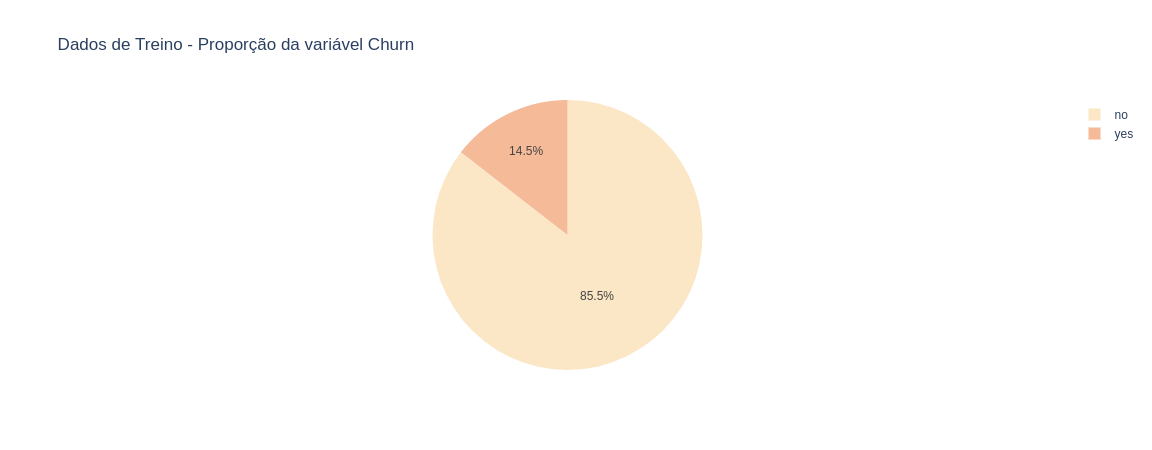

In [100]:
# Verificando a proporção da variável target em um gráfico de pizza

target = dados_treino_original["churn"].value_counts()
go.Figure(
    px.pie(
        dados_treino_original,
        values=target,
        title="Dados de Treino - Proporção da variável Churn",
        names=target.index,
        color_discrete_sequence=px.colors.sequential.Burgyl,
    )
)

In [101]:
# Proporção da variável target nos dados de teste.

dados_teste_original["churn"].value_counts()

no     1443
yes     224
Name: churn, dtype: int64

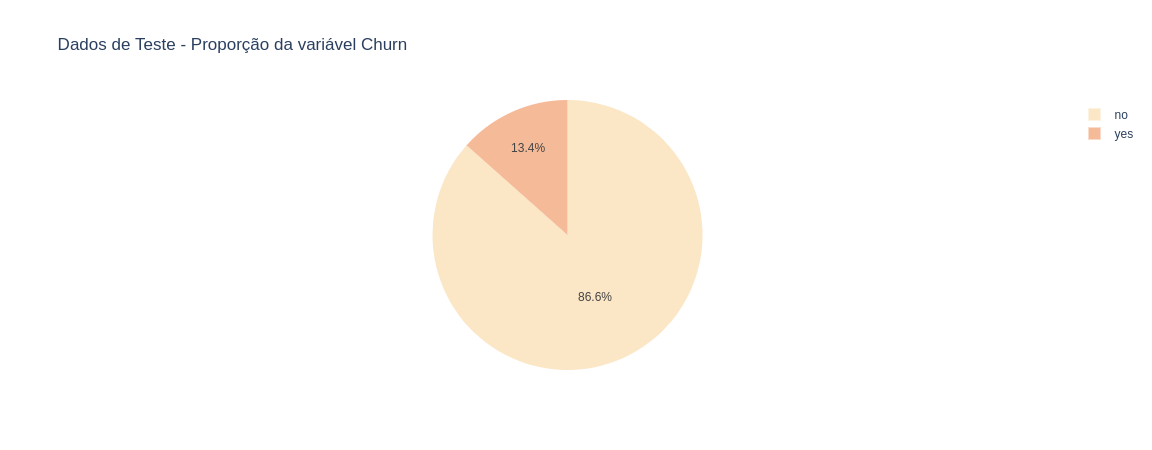

In [102]:
# Verificando a proporção da variável target em um gráfico de pizza

target = dados_teste_original["churn"].value_counts()
go.Figure(
    px.pie(
        dados_teste_original,
        values=target,
        title="Dados de Teste - Proporção da variável Churn",
        names=target.index,
        color_discrete_sequence=px.colors.sequential.Burgyl,
    )
)

Vemos que a variável **Target** tem uma distribuição muito **desproporcional** em ambos os datasets, fato que precisamos dar atenção na construção dos modelos.

#### **3.1.1.2 Verificando a Proporção das Variáveis Categóricas**

Para a **Análise Exploratória** dos dados vamos trabalhar com os **dados de treino**.

Variável **state**

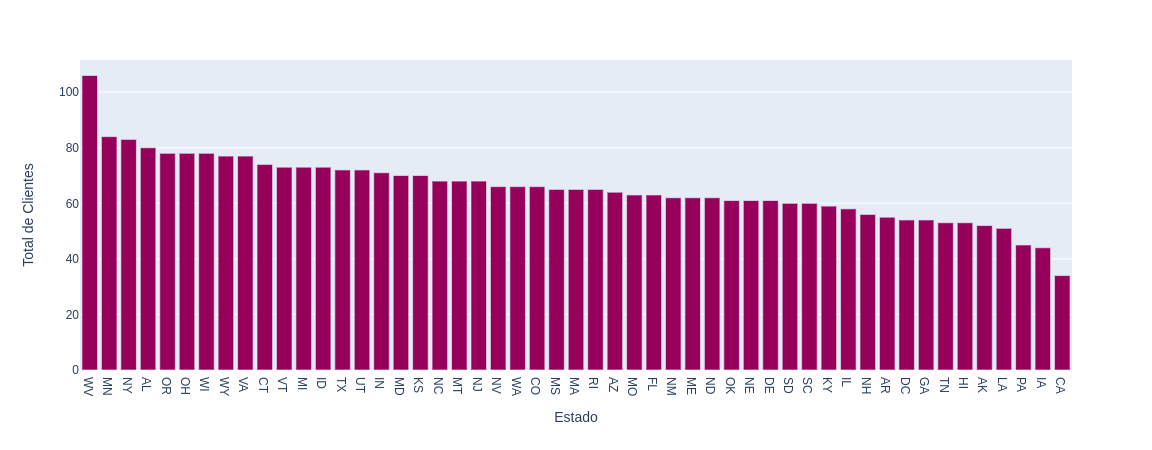

In [103]:
# Gráfico de barras com a distribuição de clientes por estado.

b_state = px.bar(
    dados_treino_original["state"].value_counts(),
    y="state",
    labels={"state": "Total de Clientes", "index": "Estado"},
    color_discrete_sequence=px.colors.sequential.Rainbow,
)
b_state.update_xaxes(categoryorder="total descending")
go.Figure(b_state)

O gráfico nos mostra que a **West Virginia (WV)** é o estado que possui o **maior** número de clientes e o estado da **California** (CA) é o estado com o **menor** número de clientes.

Demais variáveis categóricas:

**area_code  
international_plan  
voice_mail_plan**

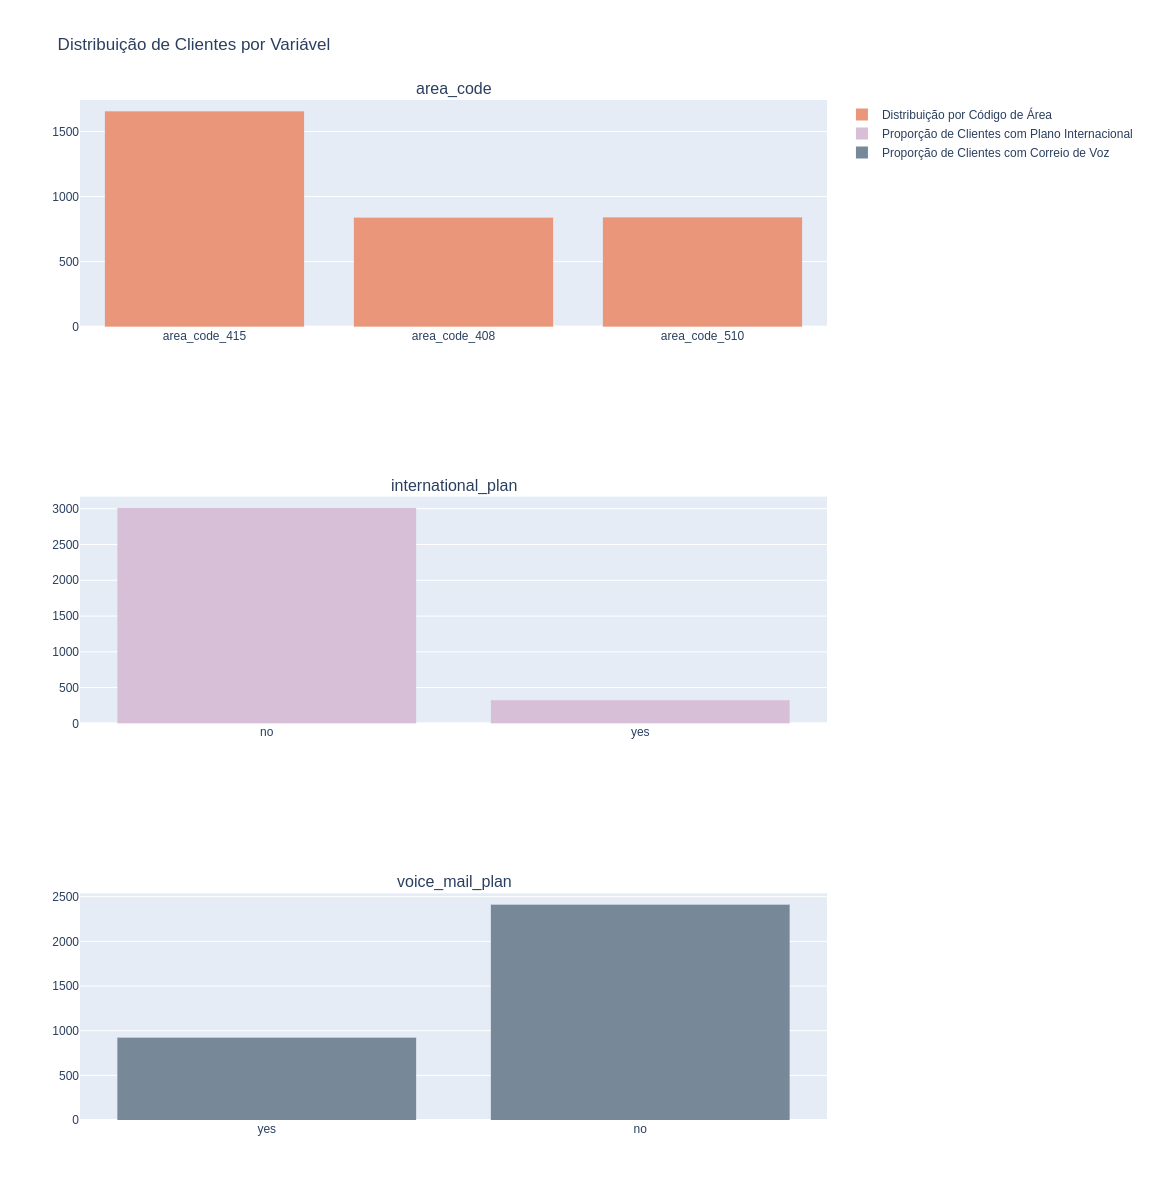

In [104]:
# Subplots com as distribuições das variáveis area_code, international_plan, voice_mail_plan.

h2 = go.Histogram(
    x=dados_treino_original["area_code"],
    name="Distribuição por Código de Área",
    marker={"color": "darksalmon"},
)
h3 = go.Histogram(
    x=dados_treino_original["international_plan"],
    name="Proporção de Clientes com Plano Internacional",
    marker={"color": "thistle"},
)
h4 = go.Histogram(
    x=dados_treino_original["voice_mail_plan"],
    name="Proporção de Clientes com Correio de Voz",
    marker={"color": "lightslategray"},
)

fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=("area_code", "international_plan", "voice_mail_plan"),
)


fig.add_trace(h2, 1, 1)
fig.add_trace(h3, 2, 1)
fig.add_trace(h4, 3, 1)

fig.update_layout(
    height=1200, width=1100, title="Distribuição de Clientes por Variável"
)
f = go.Figure(fig)
f.show()

O código de área 415 concentra um maior número de clientes.
A maioria dos clientes não possuem Plano Internacional ou Correio de Voz.

#### **3.1.1.3 Análise das variáveis categóricas em relação à variável TARGET**

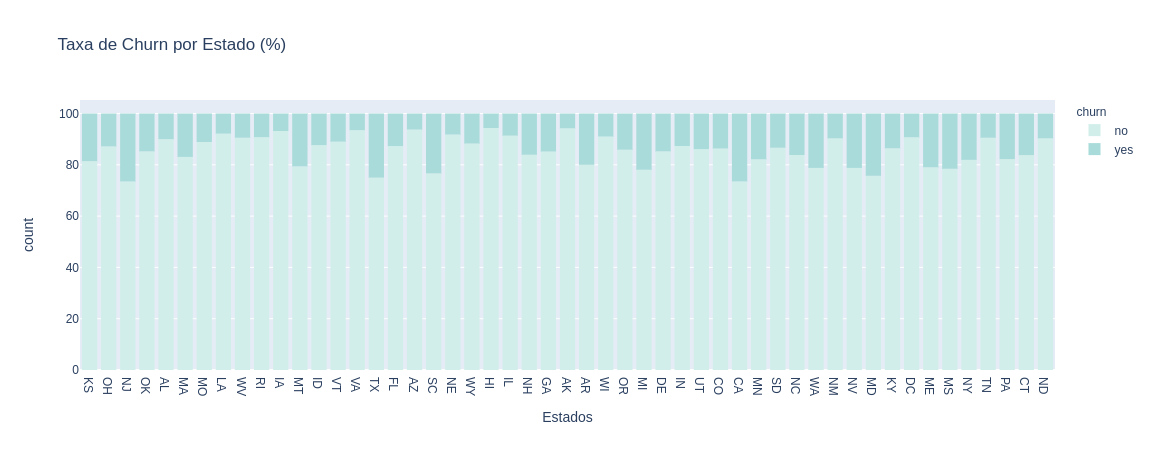

In [105]:
# Plot da proporção de Churn por Estado.

c1 = px.histogram(
    dados_treino_original,
    x="state",
    color="churn",
    barnorm="percent",
    title="Taxa de Churn por Estado (%)",
    labels={"index": "Proporção", "state": "Estados"},
    color_discrete_sequence=px.colors.sequential.Teal,
)
go.Figure(c1)

O gráfico mostra a Taxa de Churn por estado, indicando que os estados **California (CA)** com **26,47%**, **New Jersey (NJ)** também com **26,47%** e **Texas (TX)** com **25%**, são os estados com maiores Taxas de Churn.

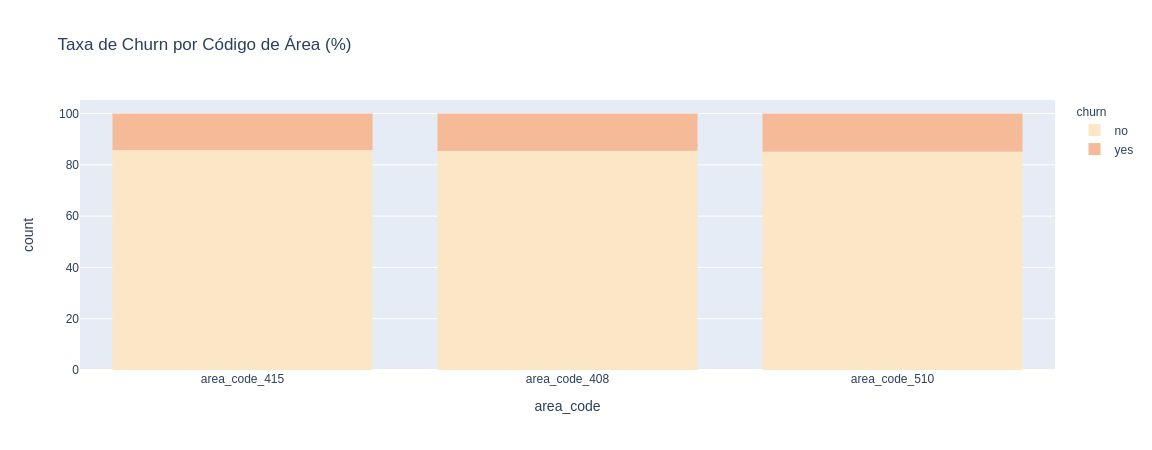

In [106]:
# Plot da proporção de Churn por código de área.

c2 = px.histogram(
    dados_treino_original,
    x="area_code",
    color="churn",
    barnorm="percent",
    title="Taxa de Churn por Código de Área (%)",
    color_discrete_sequence=px.colors.sequential.Burgyl,
)
go.Figure(c2)

O gráfico mostra a Taxa de Churn por código de área, que se apresenta em proporções similares em cada área, o que nos indica que não há uma relação de churn com uma área específica dentro do nosso conjunto de dados.

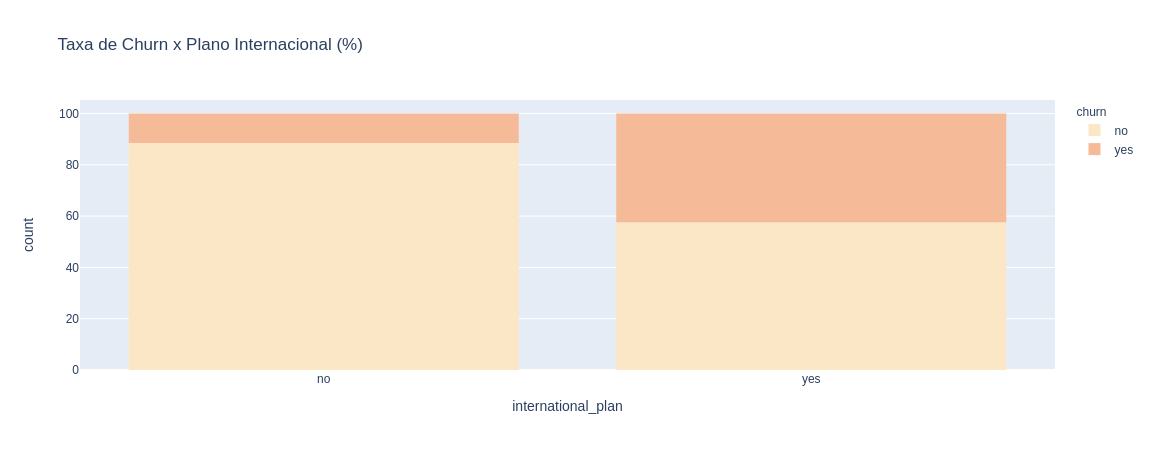

In [107]:
# Plot da proporção de Churn clientes considerando o plano internacional.

c3 = px.histogram(
    dados_treino_original,
    x="international_plan",
    color="churn",
    barnorm="percent",
    title="Taxa de Churn x Plano Internacional (%)",
    color_discrete_sequence=px.colors.sequential.Burgyl,
)
go.Figure(c3)

O gráfico nos mostra uma Taxa de Churn consideravelmente maior entre clientes que possuem plano internacional.

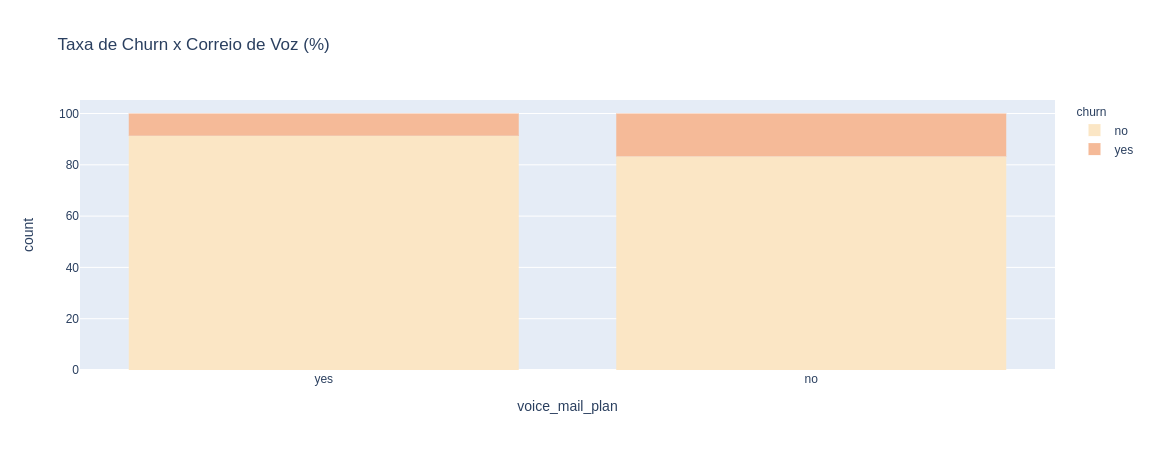

In [108]:
c4 = px.histogram(
    dados_treino_original,
    x="voice_mail_plan",
    color="churn",
    barnorm="percent",
    title="Taxa de Churn x Correio de Voz (%)",
    color_discrete_sequence=px.colors.sequential.Burgyl,
)
go.Figure(c4)

O gráfico nos mostra que a Taxa de Churn é aproximadamente 2x maior entre clientes que não possuem plano de correio de voz.

### **3.1.2 Explorando Variáveis Numéricas**

#### **3.1.2.1 Análise conjunta**

Iniciamos a análise exploratória das variáveis numéricas calculando a correlação nos dados originais.

**Matriz de Correlação**

In [109]:
# Correlação

cor = dados_treino_original.corr()
cor

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


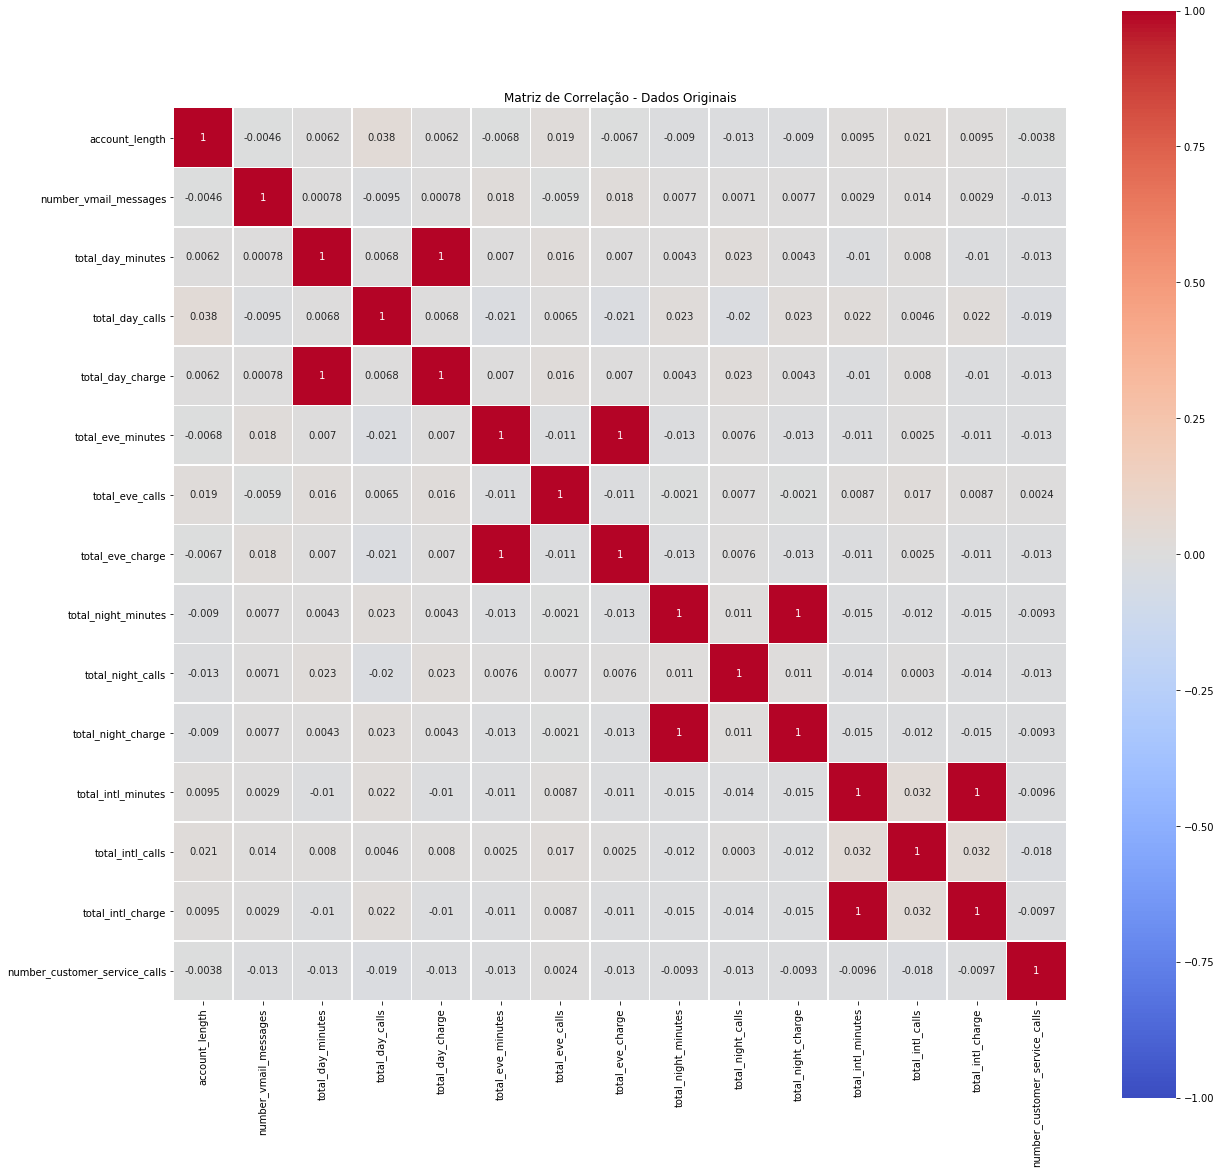

In [110]:
# Plot da matriz de correlação.

plt.subplots(figsize=(20, 20))
plt.title("Matriz de Correlação - Dados Originais")
sns.heatmap(
    data=cor,
    mask=np.zeros_like(cor),
    vmax=1,
    vmin=-1,
    linewidths=0.5,
    square=True,
    cmap="coolwarm",
    annot=True,
)

In [111]:
# Extraindo as variáveis mais relacionadas

# Seleciona apenas a parte superior da matrix de correlação

alta_corr = cor.abs().where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

# Filtramos as variáveis altamente correlacionadas

multi = [col for col in alta_corr.columns if any(alta_corr[col] > 0.9)]
multi

['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

Verificamos então a existência de vários pares de variáveis altamente correlacionadas positivamente:


total_day_charge       |    total_day_minutes

total_eve_charge       |    total_eve_minutes

total_night_charge     |    total_night_minutes

total_intl_charge      |    total_intl_charge

O que significa que essas variáveis são similares e representa redundância de informação.

**Scatter Plot Geral - Relacionamentos em Pares**

In [112]:
# sns.pairplot(dados_treino_original)

Com a função pairplot podemos ter essa visão rápida e geral sobre a distribuição e o relacionameto entre todas as variáveis.  

Podemos agora analisar com mais detalhes as variáveis que nos chamaram a atenção.

#### **3.1.2.2 Análise Univariada**

Análise univariada de algumas das variáveis numéricas que podem ser mais relevantes para os modelos.

Variável **number_vmail_messages**

Text(0.5, 1.0, 'Distribuição - number_vmail_messages')

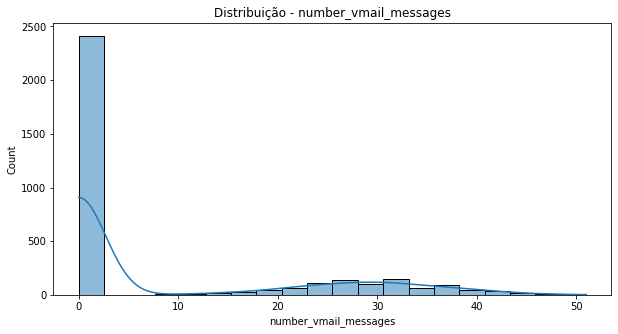

In [113]:
# Plot da distribuição da variável number_vmail_messages

plt.figure(figsize=(10, 5))
sns.histplot(
    dados_treino_original.number_vmail_messages, stat="count", kde=True
).set_title("Distribuição - number_vmail_messages")

In [114]:
# Verificando a frequência para os valores da variável

dados_treino_original.number_vmail_messages.value_counts().head()

0     2411
31      60
29      53
28      51
33      46
Name: number_vmail_messages, dtype: int64

A distribuição de valores da variável **number_vmail_messages** nos indica uma alta frequência de **0**s, que é devida ao alto número de clientes que não possuem plano de correio de voz.

Plotaremos as variáveis com informações relacionadas a **minutes**, **calls** e **charge** agrupadas para que possamos ter uma melhor visualização da variação dessas informações ao longo do dia.

Variáveis **total_day_minutes** | **total_eve_minutes** | **total_night_minutes**

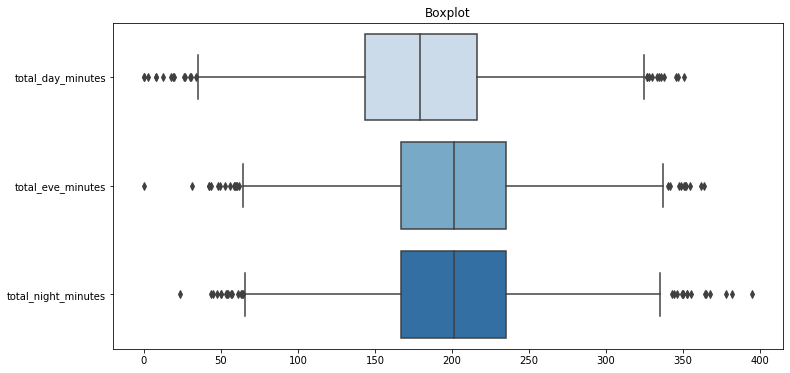

In [115]:
# boxplot das variáveis

plt.figure(figsize=(12, 6))
plt.title("Boxplot")
sns.boxplot(
    data=dados_treino_original[
        ["total_day_minutes", "total_eve_minutes", "total_night_minutes"]
    ],
    orient="h",
    palette="Blues",
)

Os Boxplots que nos mostram como estão distribuídas informações das variáveis dentro do range de valores, podemos observar uma distribuição semelhante para os três períodos do dia. O que nos sugere que os minutos gastos em ligações são próximos para cada um dos períodos, com uma pequena diferença para o total de minutos em ligações realizadas no período do dia, que apresenta uma minutagem menor que os demais períodos.  
Mas notamos que em todos os períodos, a maioria das ligações estão entre 150 e 230 minutos aproximadamente.
Observamos também a presença de outliers em todos os períodos do dia, tanto de valores discrepantes inferiores, quanto superiores, o que nos indica a presença de clientes que totalizam poucos minutos em ligações, em contrapartida que temos clientes que registram um total discrepante em minutos de ligações. Destaque para o período da noite.

Variáveis **total_day_calls** | **total_eve_calls** | **total_night_calls**

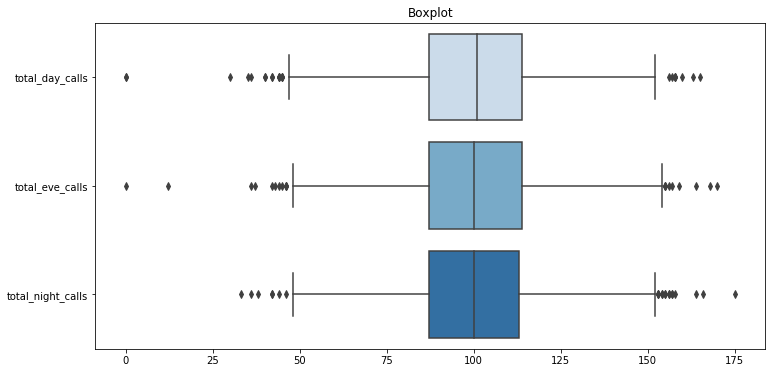

In [116]:
# boxplot das variáveis

plt.figure(figsize=(12, 6))
plt.title("Boxplot")
sns.boxplot(
    data=dados_treino_original[
        ["total_day_calls", "total_eve_calls", "total_night_calls"]
    ],
    orient="h",
    palette="Blues",
)

Para as variáveis que representam a quantidade de ligações ao longo do dia também apresentam o mesmo padrão, tendo uma distribuição similar do total de ligações em todos os períodos do dia, tendo o IQR (50% dos dados) aproximadamente entre 85 e 110 ligações. Acompanhando as variáveis anteriores que representavam os minutos, observados outliers tanto inferiores, quanto superiores, representando aqueles clientes que fazem poucas ligações ou muitas ligações.

Variáveis **total_day_charge** | **total_eve_charge** | **total_night_charge**

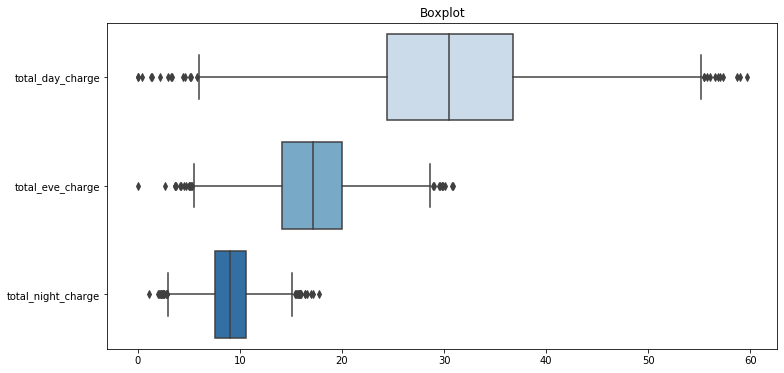

In [117]:
# boxplot das variáveis

plt.figure(figsize=(12, 6))
plt.title("Boxplot")
sns.boxplot(
    data=dados_treino_original[
        ["total_day_charge", "total_eve_charge", "total_night_charge"]
    ],
    orient="h",
    palette="Blues",
)

Para as variáveis que representam os custos totais nos diferentes períodos do dia, percebemos os custos diminuem ao longo do dia. Os boxplots nos indicam que os custos totais das ligações diurnas são mais elevados, seguidos pelos custos das ligações feitas no fim da tarde, e por fim sendo os menores custos os das ligações noturnas. Fato que pode ajudar a explicar as ligações com um total de minutos mais elevados ocorrerem a noite, como vimos anteriormente.

Para as variáveis que descrevem o total de ligações, o total de minutos e o custo total em ligações internacionais, analisaremos separadamente para uma melhor visualização.

Variável **total_intl_minutes**

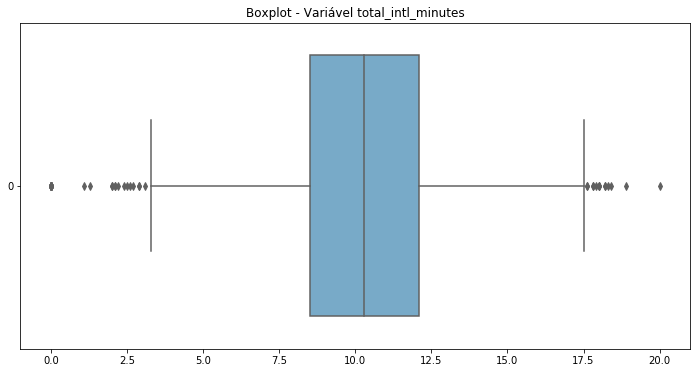

In [118]:
# boxplot da variável

plt.figure(figsize=(12, 6))
plt.title("Boxplot - Variável total_intl_minutes")
sns.boxplot(
    data=dados_treino_original["total_intl_minutes"],
    orient="h",
    palette="Blues",
)

O boxplot nos mostra que 50% dos clientes totalizam entre 8 e 12 minutos em ligações internacionais, aproximadamente.

Variável **total_intl_calls**

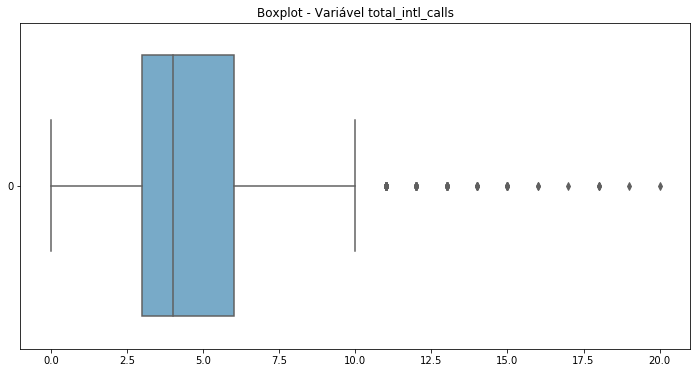

In [119]:
# boxplot da variável

plt.figure(figsize=(12, 6))
plt.title("Boxplot - Variável total_intl_calls")
sns.boxplot(
    data=dados_treino_original["total_intl_calls"],
    orient="h",
    palette="Blues",
)

O boxplot acima nos mostra que a quantidade de ligaçõees internacionais é baixa, sendo que 50% dos clientes realizaram 3 e 6 ligações internacionais, aproximadamente.

Variável **total_intl_charge**

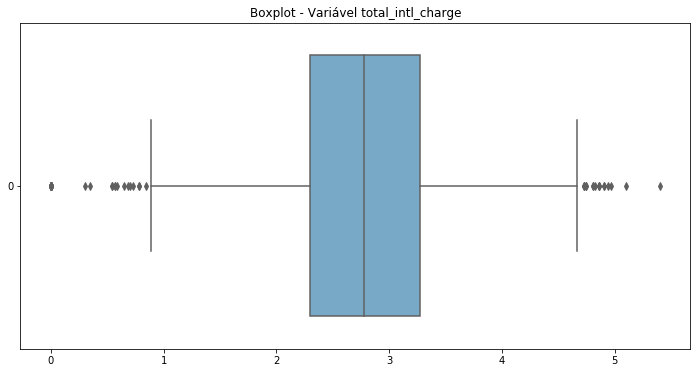

In [120]:
# boxplot da variável

plt.figure(figsize=(12, 6))
plt.title("Boxplot - Variável total_intl_charge")
sns.boxplot(
    data=dados_treino_original["total_intl_charge"],
    orient="h",
    palette="Blues",
)

Vamos dar uma olhada também em como estão distribuídos os tempos de contratos dos clientes.

Variável **account_length**

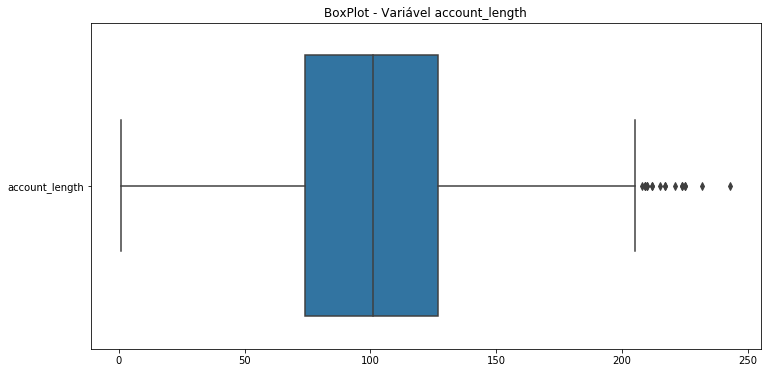

In [121]:
plt.figure(figsize=(12, 6))
plt.title("BoxPlot - Variável account_length")
sns.boxplot(data=dados_treino_original[["account_length"]], orient="h")

#### **3.1.2.3 Análise Bivariada**

Ainda avaliando o Pairplot, observamos as fortes correlações positivas entre as variáveis abaixo:  

**total_intl_charge x total_intl_minutes**

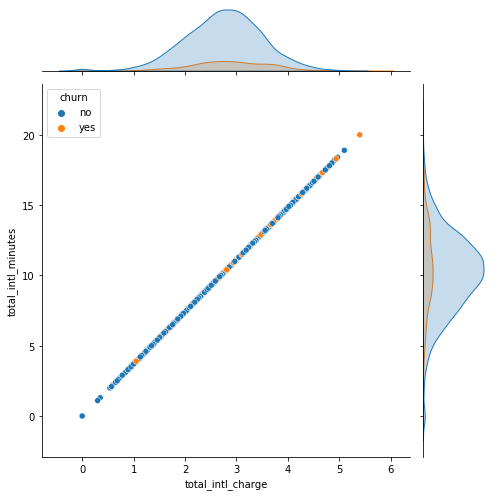

In [122]:
# scatterplot

sns.jointplot(
    x="total_intl_charge",
    y="total_intl_minutes",
    hue="churn",
    data=dados_treino_original,
    height=7,
)

**total_night_charge x total_night_minutes**


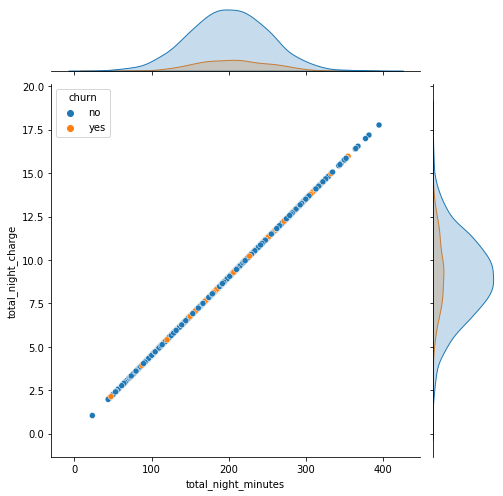

In [123]:
sns.jointplot(
    x="total_night_minutes",
    y="total_night_charge",
    hue="churn",
    data=dados_treino_original,
    height=7,
)

**total_eve_charge x total_eve_minutes**

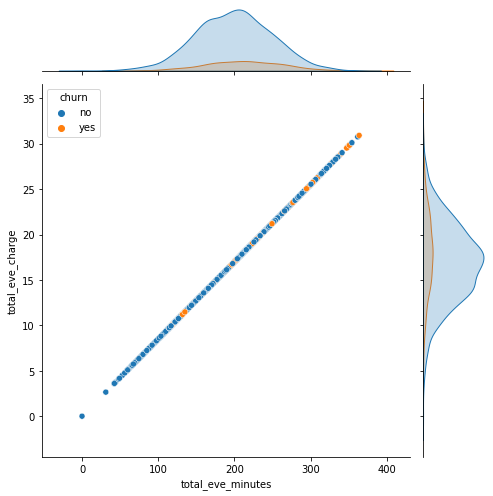

In [124]:
sns.jointplot(
    x="total_eve_minutes",
    y="total_eve_charge",
    hue="churn",
    data=dados_treino_original,
    height=7,
)

**total_day_charge x total_day_minutes**


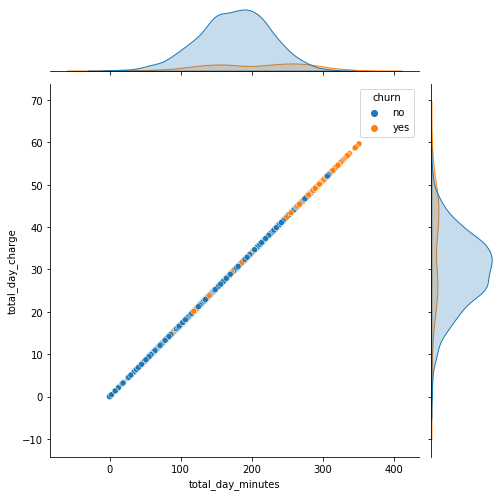

In [125]:
# Scatterplot

sns.jointplot(
    x="total_day_minutes",
    y="total_day_charge",
    hue="churn",
    data=dados_treino_original,
    height=7,
)

Como já observado no cálculo de correlação e também nos gráficos, é evidente a forte correlação positiva entre as variáveis.
Altas correlações indicam **multicolinearidade**, que implica em redundância de informação e deve ser evitada na construção dos modelos.

Uma rápida análise do perfil de consumo dos clientes, obervando o total de minutos em cada período do dia.

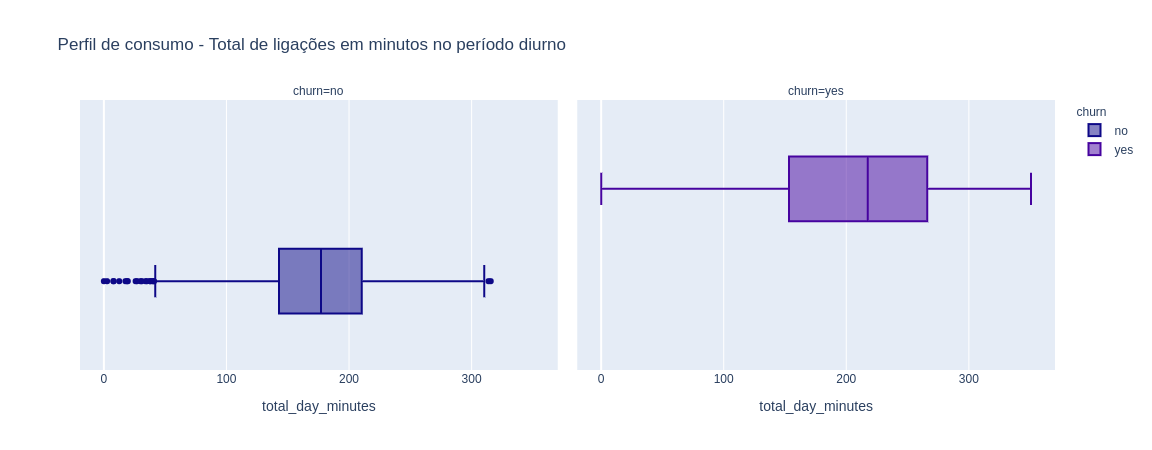

In [126]:
c3 = px.box(
    dados_treino_original,
    x="total_day_minutes",
    facet_col="churn",
    color="churn",
    title="Perfil de consumo - Total de ligações em minutos no período diurno",
    color_discrete_sequence=px.colors.sequential.Plasma,
)
go.Figure(c3)

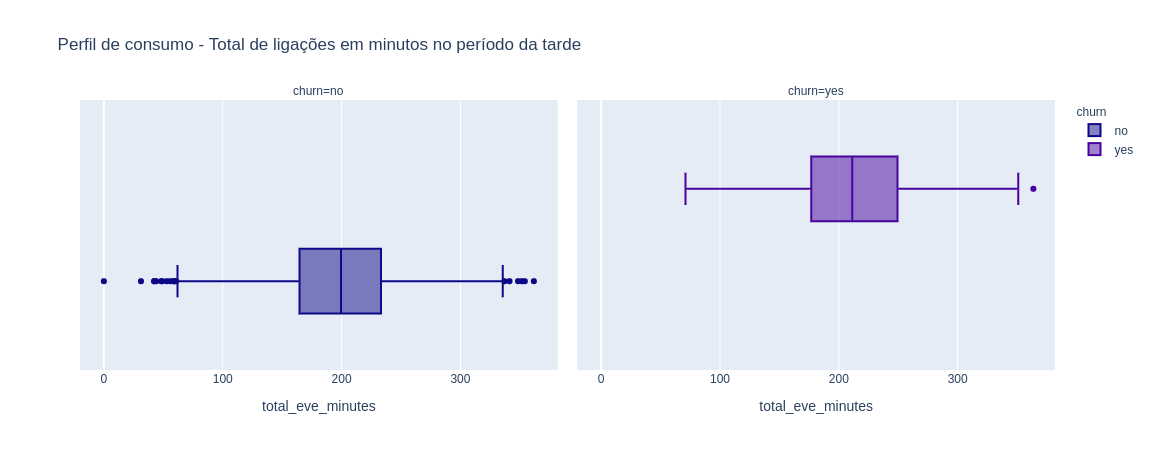

In [127]:
c3 = px.box(
    dados_treino_original,
    x="total_eve_minutes",
    facet_col="churn",
    color="churn",
    title="Perfil de consumo - Total de ligações em minutos no período da tarde",
    color_discrete_sequence=px.colors.sequential.Plasma,
)
go.Figure(c3)

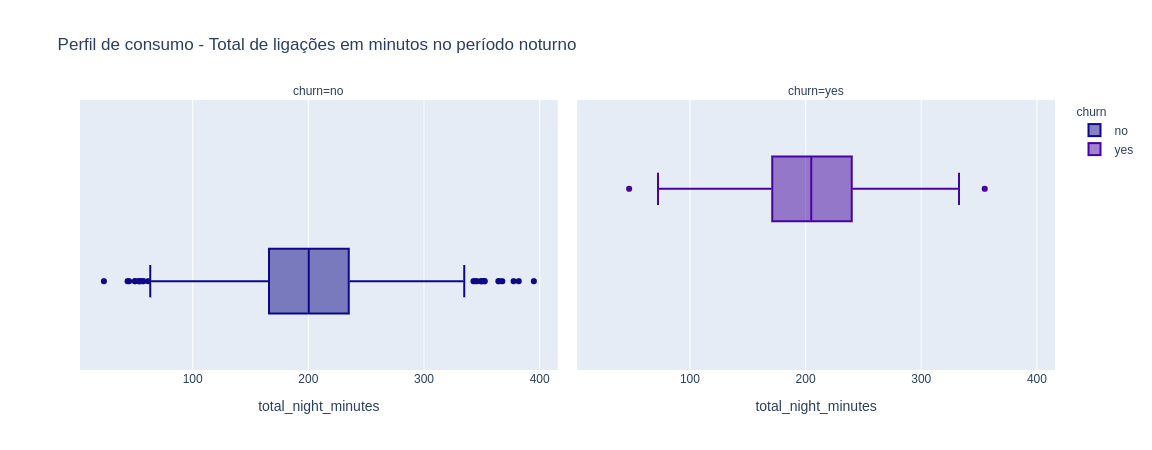

In [128]:
c3 = px.box(
    dados_treino_original,
    x="total_night_minutes",
    facet_col="churn",
    color="churn",
    title="Perfil de consumo - Total de ligações em minutos no período noturno",
    color_discrete_sequence=px.colors.sequential.Plasma,
)
go.Figure(c3)

Nos boxplots acima analisamos o total de minutos de ligações nos diferentes períodos do dia, para os dois grupos de clientes, os que não fizeram churn e os que fizeram churn. Em todos os períodos observamos que os clientes que fizeram churn acumularam mais minutos em ligações, ou seja, utilizaram um pouco mais o serviço. Destaque para o período do dia, onde essa diferença é mais notória. Os clientes que fizeram churn acumularam mais minutos nesse período. Como observamos anteriormente, os custos de ligações no período diurno são os mais altos. Isso pode ser entendido como um possível motivador para o churn, uma vez que o perfil desses clientes mostra maior consumo em minutos no período diurno.

A variável **number_customer_service_calls** representa a informação de quantidade de ligações para operadora realizadas pelos clientes.
Podemos analisar o perfil dos clientes que mais realizam ligações.

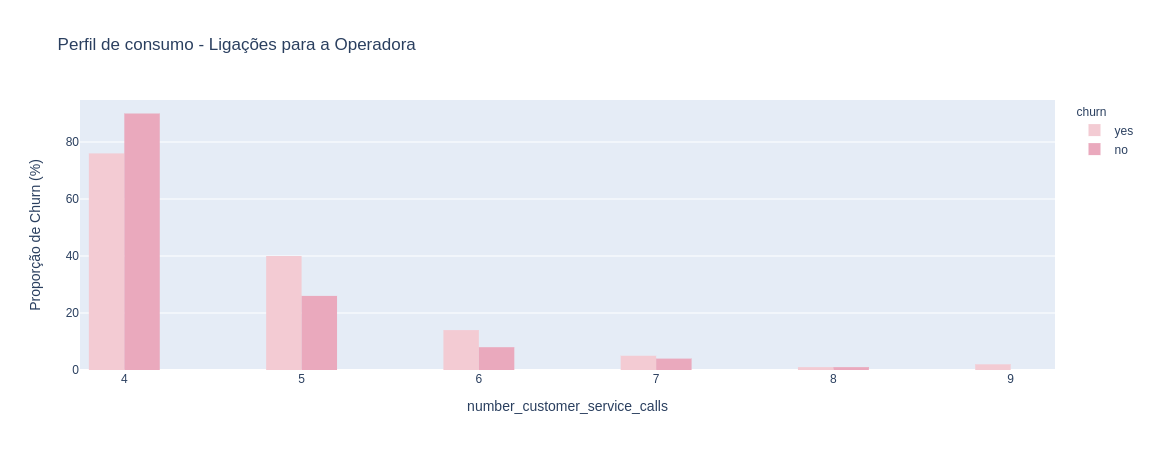

In [129]:
lig = dados_treino_original[dados_treino_original["number_customer_service_calls"] > 3]
c = px.histogram(
    lig,
    x="number_customer_service_calls",
    barmode="group",
    color="churn",
    nbins=20,
    color_discrete_sequence=px.colors.sequential.Magenta,
    title="Perfil de consumo - Ligações para a Operadora",
)
c.update_layout(yaxis_title_text="Proporção de Churn (%)")

Podemos analisar o perfil dos clientes que mais realizam chamadas de atendimento. Se analisarmos os clientes que realizaram 4 ou mais chamadas, observamos que acima de 4 chamadas os clientes que realizaram churn representam a maioria. Essa observação pode nos indicar que clientes insatisfeitos ligam mais para os serviços de atendimento, podendo chegar a um cancelamento dos serviços.

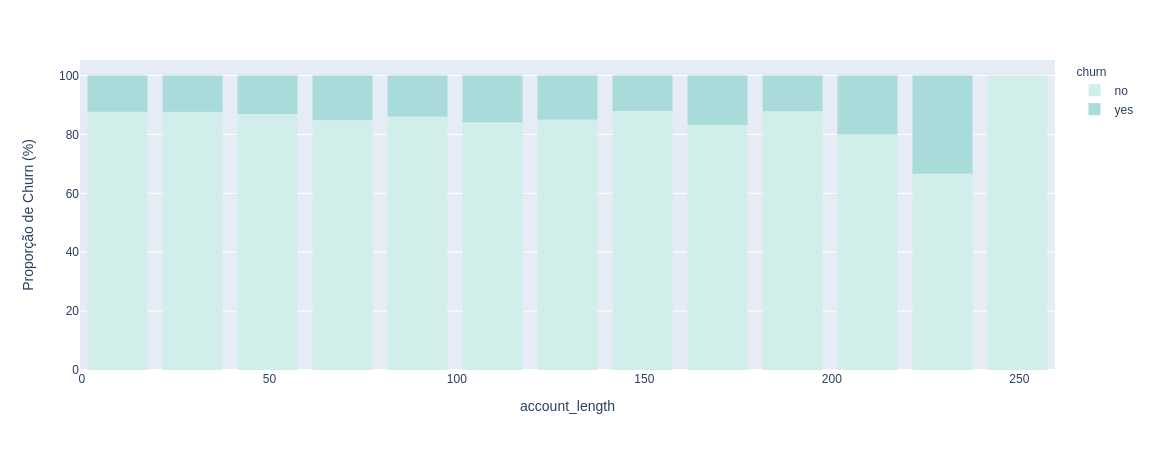

In [130]:
acc = px.histogram(
    dados_treino_original,
    x="account_length",
    barnorm="percent",
    color="churn",
    nbins=20,
    color_discrete_sequence=px.colors.sequential.Teal,
)
acc.update_layout(yaxis_title_text="Proporção de Churn (%)", bargap=0.2)

O gráfico nos mostra a relação do tempo de contrato dos clientes e a proporção de churn. Vemos que a taxa de churn não varia muito com o tempo de contrato. Há uma variação maior para contratos mais longos, mas essa taxa é alta devido ao pequeno número de clientes nessa faixa. 

# **4. Pré-Processamento dos Dados**

Aqui começamos a preparar os dados de acordo com o que foi observado na Análise Exploratória.

Vejamos um resumo do que foi observado:

- Variável Target desbalanceada e podemos utilizar técnicas de balanceamento.

- Não há valores nulos no dataset;

- Variáveis categóricas importadas como tipo "Object" e podemos transformá-las para o tipo "Category";

- Variáveis do tipo numéricas "int" e "float";

- Variáveis altamente correlacionadas que resultam em multicolinearidade e devem ser excluídas;

- Aplicar Encode às variáveis categóricas.


## **4.1 Definindo Funções**

Algumas funções que vão auxiliar na preparação dos dados.

In [131]:
# Função para deletar colunas do dataframe


def drop_col(df, columns):

    df = df.drop(columns=columns, axis=1)

    return df

In [132]:
# Função para converter o tipo das variáveis codificadas em categorias.


def var_categorica(df, lista):

    df[lista] = df[lista].astype("category")

    return df

In [133]:
# Função para codificar as variáveis categóricas


def encoder_cat(df):

    enc = OrdinalEncoder()
    enc.fit(df)
    cat = enc.transform(df)

    return cat

In [134]:
# Função para codificar a variável TARGET:


def encoder_target(df):

    le = LabelEncoder()
    le.fit(df)
    df_t = le.transform(df)

    return df_t

In [135]:
# Função para criar um dataframe com o resultado das variáveis codificadas gerando um dataframe numérico


def df_numerico(df, var_categ, target):

    # Codificando a variável Target
    y = encoder_target(df[target])

    # Codificando as variáveis categóricas

    x_categ = encoder_cat(df[var_categ])

    # Criamos agora datasets totalmente numéricos para aplicação ao modelo

    df[var_categ] = x_categ

    df[target] = y

    return df

In [136]:
# Normalização MinMaxScaler


def normaliza(df):

    # Carregando os valores dos dados de treino em um array
    x = df.values

    # Colocando os dados em uma escala de 0 a 1

    escala = MinMaxScaler(feature_range=(0, 1)).fit(x)
    x_norm = escala.transform(x)

    return x_norm

In [137]:
## Pradronização StandardScaler


def padroniza(df):

    # Carregando os valores dos dados de treino em um array
    x = df.values

    # Colocando os dados em uma escala de 0 a 1

    escala = Normalizer().fit(x)
    x_norm = escala.transform(x)

    return x_norm

In [138]:
def separa_target(df):

    # Carrega a variável target na variável y, e automaticamente a exclui do dataframe
    y = df.pop("churn")

    return df, y

## **4.2 Transformando os Dados**

Começando com alguns processamentos nos dados.

### **4.2.1 Reorganizando os Dados**

Reorganizando as posições das variáveis, agrupando em variáveis numéricas e categóricas.

In [895]:
# Reorganizando a posição das colunas para que as variáveis numéricas fiquem agrupadas

ordem = [
    "state",
    "area_code",
    "international_plan",
    "voice_mail_plan",
    "account_length",
    "number_vmail_messages",
    "total_day_minutes",
    "total_day_calls",
    "total_day_charge",
    "total_eve_minutes",
    "total_eve_calls",
    "total_eve_charge",
    "total_night_minutes",
    "total_night_calls",
    "total_night_charge",
    "total_intl_minutes",
    "total_intl_calls",
    "total_intl_charge",
    "number_customer_service_calls",
    "churn",
]
dados_treino_original = dados_treino_original[ordem]
dados_teste_original = dados_teste_original[ordem]

### **4.2.2 Encoder**

Aplicando o encoder, codificamos as variáveis categóricas atribuindo números a cada uma de suas categorias de dados.  
Dessa maneira temos conjuntos de dados apenas com valores numéricos, que podem ser melhor aplicados nos modelos.

In [896]:
# Gerando novos dataframes de treino e teste apenas com números.

# Variáveis categóricas
categoricas = ["state", "area_code", "international_plan", "voice_mail_plan"]
target = "churn"

# Função que condifica as variáveis categóricas e gera novos dataframes
df_treino_num = df_numerico(dados_treino_original, categoricas, target)
df_teste_num = df_numerico(dados_teste_original, categoricas, target)

Com a codificação das variáveis categóricas, a variável **Target** agora possui representação numérica:  

**churn:**  

**Yes - 1  
No - 0**

### **4.2.3 Eliminando Variáveis** 

Conforme já havíamos observado na nossa análise exploratória, notamos que as variáveis abaixo são altamente correlacionadas,
apresentando assim um problema de **multicolinearidade**. Portanto faz-se necessária a **exclusão** de uma variável de cada par para evitarmos a redundância de informações ao treinarmos os modelos.

total_day_charge       |    total_day_minutes

total_eve_charge       |    total_eve_minutes

total_night_charge     |    total_night_minutes

total_intl_charge      |    total_intl_charge

In [897]:
# Excluiremos portanto 4 variáveis dos nossos datasets de treino e teste

df_treino_num2 = drop_col(df_treino_num, multi)
df_teste_num2 = drop_col(df_teste_num, multi)

### **4.2.4 Transformando os tipos de dados**

In [898]:
# Transformamos as variáveis codificadas para o tipo "category"

categoricas.append("churn")
df_treino = var_categorica(df_treino_num2, categoricas)
df_teste = var_categorica(df_teste_num2, categoricas)

df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   category
 1   area_code                      3333 non-null   category
 2   international_plan             3333 non-null   category
 3   voice_mail_plan                3333 non-null   category
 4   account_length                 3333 non-null   int64   
 5   number_vmail_messages          3333 non-null   int64   
 6   total_day_minutes              3333 non-null   float64 
 7   total_day_calls                3333 non-null   int64   
 8   total_eve_minutes              3333 non-null   float64 
 9   total_eve_calls                3333 non-null   int64   
 10  total_night_minutes            3333 non-null   float64 
 11  total_night_calls              3333 non-null   int64   
 12  total_intl_minutes             333

# **5. Feature Selection**

**Separação em Dados de Entrada e Saída**

Separando os dataframes de treino e teste em variáveis preditoras e variável target.

In [143]:
# Extraindo a variável target dos dados de treino

df_x_treino, y_treino = separa_target(df_treino)

In [144]:
# Verificando o resultado para os dados de treino que vamos trabalhar

df_x_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   category
 1   area_code                      3333 non-null   category
 2   international_plan             3333 non-null   category
 3   voice_mail_plan                3333 non-null   category
 4   account_length                 3333 non-null   int64   
 5   number_vmail_messages          3333 non-null   int64   
 6   total_day_minutes              3333 non-null   float64 
 7   total_day_calls                3333 non-null   int64   
 8   total_eve_minutes              3333 non-null   float64 
 9   total_eve_calls                3333 non-null   int64   
 10  total_night_minutes            3333 non-null   float64 
 11  total_night_calls              3333 non-null   int64   
 12  total_intl_minutes             333

In [145]:
# Verificando o resultado da variável target extraída dos dados de treino

y_treino

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: category
Categories (2, int64): [0, 1]

Temos agora os dados de treino divididos em dados de **entrada** e **saída**.

**Normalização**

Vamos aplicar normalização aos dados de entrada para uma melhor avaliação dos métodos de feature selection.

In [146]:
# Chamada da função normaliza(), que a aplica a normalização MinMaxScaler().

x_treino_norm = normaliza(df_x_treino)

Com os dados nesse formato, podemos agora aplicar algumas técnicas para avaliarmos quais variáveis de entada (preditoras) são mais relevantes e relacionadas com a variável de saída (target). Essas técnicas nos auxiliam ao indicar quais variáveis ajudam a explicar melhor a variável de saída, sendo assim as mais relevantes para aplicarmos na costrução dos modelos.

## **5.1 KBEST**

Testes estatísticos podem ser usados para selecionar os atributos (variáveis) que possuem forte relacionamento com a variável que estamos tentando prever. O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos. Vamos usar o teste qui-quadrado e avaliarmos quais atributos podem ser usados como variáveis preditoras.

Estamos trabalhando com 15 variáveis preditoras e avaliaremos a relevância de cada uma.

In [147]:
# A função nos dá uma pontuação para cada variável preditora de acordo com sua relevância para explicar a cariável Target
kbest = SelectKBest(score_func=chi2, k="all")

# Executa a função de pontuação nos dados de treino
kbest.fit_transform(x_treino_norm, y_treino)

score = kbest.scores_

# Preparando um dataframe para melhor visualização do score
var_score_kbest = pd.DataFrame(score, index=df_x_treino.columns, columns=["Score"])
var_score_kbest.sort_values("Score", ascending=False)

,Score
international_plan,203.244178
voice_mail_plan,25.156959
number_customer_service_calls,17.863732
number_vmail_messages,12.169192
total_day_minutes,6.596834
total_eve_minutes,1.009526
total_intl_calls,0.629138
total_intl_minutes,0.590654
total_night_minutes,0.162521
account_length,0.059699


## **5.2 Extra Trees Classifier**

Bagged Decision Trees, como o algoritmo RandomForest, podem ser usados para estimar a importância de cada variável.  
Esse método também retorna um score para cada uma das variáveis.

In [148]:
# Criando e treinando o modelo para que possamos extrair as pontuações para cada variável preditora.

modelo_etc = ExtraTreesClassifier()
modelo_etc.fit(x_treino_norm, y_treino)

score_etc = modelo_etc.feature_importances_

var_score_etc = pd.DataFrame(score_etc, index=df_x_treino.columns, columns=["Score"])
var_score_etc.sort_values("Score", ascending=False)

,Score
total_day_minutes,0.185253
number_customer_service_calls,0.124658
total_eve_minutes,0.080851
international_plan,0.073039
total_intl_minutes,0.069950
total_intl_calls,0.065446
total_night_minutes,0.059789
total_day_calls,0.057416
account_length,0.055963
total_night_calls,0.054469


## **5.3 Ganho de Informação**

Este método utiliza basicamente a informação mútua. Ele calcula o valor da informação mútua para cada uma das variáveis preditoras em relação à variável target e seleciona aquelas que têm mais ganho de informação. Em outras palavras, ele basicamente mede a dependência dessas variáveis com o valor de saída. 

In [149]:
# Extraindo as pontuações para cada variável preditora.

score_gi = mutual_info_classif(
    x_treino_norm, y_treino, discrete_features="auto", n_neighbors=3
)

var_score_gi = pd.DataFrame(score_gi, index=df_x_treino.columns, columns=["Score"])
var_score_gi.sort_values("Score", ascending=False)

,Score
total_day_minutes,0.052190
number_customer_service_calls,0.039490
international_plan,0.030319
state,0.024741
number_vmail_messages,0.008751
total_intl_minutes,0.004439
total_night_calls,0.004037
area_code,0.003029
total_intl_calls,0.002740
voice_mail_plan,0.002707


Observamos que cada método nos retorna avaliações diferentes. Algumas variáveis são apontadas com maior relevância e aparecem em todas as diferentes métricas. Observando as avaliações, vamos selecionar as seguintes variáveis para compor um conjunto de dados que consideraremos relevante e que será testado em diferentes modelos.

total_day_minutes  
number_customer_service_calls 
international_plan  
number_vmail_messages  
voice_mail_plan  
total_eve_minutes  
total_intl_minutes

# **6. Modelagem Preditiva**

## **6.1 Definindo Funções**

In [150]:
# Criando uma função para avaliar vários modelos de classificação


def Classificadores(x, y):

    # Normalizando os dados de entrada para aplicar aos modelos

    x = normaliza(x)

    # Definindo os valores para o número de folds
    num_folds = 10

    # Preparando a lista de modelos
    modelos = []
    modelos.append(("LR", LogisticRegression()))
    modelos.append(("LDA", LinearDiscriminantAnalysis()))
    modelos.append(("NB", GaussianNB()))
    modelos.append(("KNN", KNeighborsClassifier()))
    modelos.append(("CART", DecisionTreeClassifier()))
    modelos.append(("SVM", SVC()))
    modelos.append(("RF", RandomForestClassifier()))
    modelos.append(("GB", GradientBoostingClassifier()))
    modelos.append(("XGBoost", XGBClassifier()))

    # Avaliando cada modelo em um loop e salvando a média e o desvio padrão para cada modelo

    results = []
    precision = []
    recall = []
    f1 = []
    nomes = []
    resumo_mean = pd.DataFrame(
        columns=["Precision_mean", "Recall_mean", "F1-Score_mean"]
    )
    resumo_std = pd.DataFrame(columns=["Precision_std", "Recall_std", "F1-Score_std"])

    for nome, modelo in modelos:
        kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
        cv_results = cross_validate(
            modelo, x, y, cv=kfold, scoring=["precision", "recall", "f1"]
        )
        results.append(cv_results)
        precision.append(cv_results["test_precision"])
        recall.append(cv_results["test_recall"])
        f1.append(cv_results["test_f1"])
        nomes.append(nome)
        resumo_mean = resumo_mean.append(
            pd.DataFrame(
                [
                    [
                        cv_results["test_precision"].mean(),
                        cv_results["test_recall"].mean(),
                        cv_results["test_f1"].mean(),
                    ]
                ],
                columns=[
                    "Precision_mean",
                    "Recall_mean",
                    "F1-Score_mean",
                ],
                index=[nome],
            )
        )
        resumo_std = resumo_std.append(
            pd.DataFrame(
                [
                    [
                        cv_results["test_precision"].std(),
                        cv_results["test_recall"].std(),
                        cv_results["test_f1"].std(),
                    ]
                ],
                columns=[
                    "Precision_std",
                    "Recall_std",
                    "F1-Score_std",
                ],
                index=[nome],
            )
        )

    # resultados = pd.DataFrame(np.transpose(results["test_precision"]), columns=nomes)

    return resumo_mean

In [151]:
resumo_mean, resumo_std, cv_results = Classificadores(df_x_treino, y_treino)

In [233]:
# Função para plotar a Confusion Matrix


def plot_ConfusionMatrix(y_treino, y_pred):

    fig, ax = plt.subplots()
    sns.heatmap(
        confusion_matrix(y_treino, y_pred), annot=True, ax=ax, fmt="d", cmap="Reds"
    )
    ax.set_title("Confusion Matrix", fontsize=15)
    ax.set_ylabel("Valores Reais", fontsize=12)
    ax.set_xlabel("Valores Previstos", fontsize=12)
    ax.xaxis.set_ticklabels(["No", "Yes"])
    ax.yaxis.set_ticklabels(["No", "Yes"])
    plt.tight_layout()

In [383]:
def pipe_modelo(x_treino, y_treino, modelo, normalizer, params):

    num_folds = 5
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

    scaler = ("scaler", normalizer)
    model = ("Model", modelo)

    pipe = Pipeline([scaler, model])

    pipe.fit(x_treino, y_treino)

    pipe.set_params(**params)

    y_pred = cross_val_predict(pipe, x_treino, y_treino, cv=kfold)

    # Visualizando o resultado.
    report = classification_report(y_treino, y_pred)

    # Imprimindo a Confusion Matrix
    plot_ConfusionMatrix(y_treino, y_pred)

    print("\n" + "\033[1m" + "Classification Report" + "\033[00m" + "\n")
    print(report)
    print("\n\n")

    return y_pred

In [797]:
def pipe_pred(x_treino, y_treino, modelo, normalizer, params):

    num_folds = 5
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

    scaler = ("scaler", normalizer)
    model = ("Model", modelo)

    pipe = Pipeline([scaler, model])

    pipe.fit(x_treino, y_treino)

    pipe.set_params(**params)

    y_pred = cross_val_predict(
        pipe, x_treino, y_treino, cv=kfold, method="predict_proba"
    )
    y_pred = y_pred[:, 1]

    return y_pred

In [301]:
def pipe_avalia(x_treino, y_treino, modelo, normalizer, paramGrid):
    
    num_folds = 5
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

    scaler = ("scaler", normalizer)
    model = ("Model", modelo)

    pipe = Pipeline([scaler, model])

    grid = GridSearchCV(pipe, param_grid=paramGrid, cv=kfold, verbose=True, n_jobs=-1)

    grid.fit(x_treino, y_treino)

    params = grid.best_params_

    pipe.set_params(**params)

    y_pred = cross_val_predict(pipe, x_treino, y_treino, cv=kfold)

    report = classification_report(y_treino, y_pred)

    # Visualizando o resultado.
    # Imprimindo a Confusion Matrix
    plot_ConfusionMatrix(y_treino, y_pred)

    print("\n" + "\033[1m" + "Classification Report" + "\033[00m" + "\n")
    print(report)
    print("\n\n")

    return params

In [880]:
# Função para salvar um modelo


def salva_modelo(nome, modelo, ext=".sav"):

    # Definindo diretório, nome e extensão

    dir = nome + ext

    # salva

    pickle.dump(modelo, open(dir, "wb"))

    print("Modelo salvo!")

In [918]:
# Função para carregar um modelo já treinado.


def carrega_modelo(nome, ext=".sav"):

    # Nome e extensão do arquivo

    dir = nome + ext

    print("Modelo carregado!")

    return pickle.load(open(dir, "rb"))

## **6.1 Organizando os Dados**

Vamos preparar diferentes dataframes para avaliarmos qual melhor se adapta aos modelos.

### **6.1.1 Dados Completos**

Dados com todas as variáveis preditoras pós processamento.

**Dados de Treino**

In [158]:
# Variáveis Preditoras
df_x_treino

# Variável target
y_treino

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: category
Categories (2, int64): [0, 1]

### **6.1.2 Dados Selecionados - Feature Selection**

Vamos avaliar modelos utilizando dados selecionados, utilizando apenas as variáveis preditoras mais relevantes.

In [302]:
# Dataframe de treino apenas com as variáveis preditoras selecionadas

df_x_treino_fs = df_treino[
    [
        "total_day_minutes",
        "number_customer_service_calls",
        "international_plan",
        "number_vmail_messages",
        "voice_mail_plan",
        "total_eve_minutes",
        "total_intl_minutes",
    ]
]

**Dados de Treino**

In [160]:
# Variáveis Preditoras
df_x_treino_fs

# Variável target
y_treino

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: category
Categories (2, int64): [0, 1]

## **6.2 Avaliação de Performances de Modelos**

Vamos aplicar os dados a diferentes algoritmos de classificação, assim podemos avaliar qual nos dá uma melhor resposta para nosso conjuto de dados.

Utilizando datasets de treino e teste com os seguintes processamentos: 

- Variáveis preditoras multicolineares eliminadas
- Aplicado o Encoding às variáveis categóricas


Aplicaremos então os dados de treino aos seguintes algoritmos de classificação e avaliaremos suas perfomances:

. Logistic Regression (LR)

. Linear Discriminant Analysis (LDA)

. Naive Bayes (NB)

. K-Nearest Neighbors Classifier (KNN)

. Decision Tree Classifier (CART)

. Support Vector Machines (SVM)

. Random Forest Classifier (RF)

. Gradient Boosting Classifier (GB)

. XGBoost 


### **6.2.1 Métricas de Avaliação**

Considerando que nesse momento estamos trabalhando com **dados desbalanceados**, temos então que optar métricas adequadas ao nosso cenário.
Não é o deial por exemplo utilizarmos a Acurácia, mais comumente utilizada, pois é uma métrica adequada para dados balanceados.

O desbalanceamento dos dados não é devido apenas a esse conjunto específico de dados, mas sim inerente a esse problema de negócio especificamente. Ou seja, quando falamos de Churn, estaremos sempre avaliando situações em que teremos dados desbalanceados. Uma vez que as taxas de churn são baixas normalmente, teremos sempre uma porporção desigual entre as classes a serem previstas.

Tendo isso em vista, optamos por métricas que consideram o desbalanceamento entre as classes, facilitando nossas avaliações e comparações:

**Precision**: Para cada classe, entre todas as instâncias que o modelo previu, quanto ele realmente acertou a previsão.

**Recall**: Para cada classe, quanto o modelo previu corretamente, entre as instâncias que ele deveria prever.

**F1-score**: Média harmônica entre Precision e Recall.

### **6.2.2 Testando com Dados Completos**

In [161]:
resumo_mean = Classificadores(df_x_treino, y_treino)

resumo_mean.sort_values(["F1-Score_mean"], ascending=False)

,Precision_mean,Recall_mean,F1-Score_mean
XGBoost,0.926374,0.768622,0.837751
GB,0.921939,0.731293,0.813148
RF,0.939999,0.670791,0.781830
CART,0.717651,0.722279,0.718762
NB,0.487303,0.416327,0.447895
SVM,0.832709,0.262883,0.396749
KNN,0.726341,0.252764,0.371447
LDA,0.499432,0.254889,0.334719
LR,0.609486,0.170026,0.260227


### **6.2.3 Testando com Dados Selecionados - Feature Selection**

In [162]:
resumo_mean = Classificadores(df_x_treino_fs, y_treino)

resumo_mean.sort_values(["F1-Score_mean"], ascending=False)

,Precision_mean,Recall_mean,F1-Score_mean
XGBoost,0.830220,0.660629,0.734610
GB,0.873002,0.633461,0.731226
RF,0.849553,0.637755,0.726328
CART,0.637219,0.666327,0.648842
KNN,0.796941,0.525850,0.632745
SVM,0.903955,0.360289,0.510205
NB,0.485440,0.422321,0.450440
LDA,0.466287,0.240051,0.314289
LR,0.566755,0.145026,0.229056


## **6.3 Realizando Previsões**

### **6.3.1 Otimizando Algoritmos - Ajustes de Hiperparâmetros**

Agora que avaliamos vários algoritmos e sabemos quais se ajustam melhor ao nosso conjunto de dados, vamos realizar uma busca pela melhor combinação de hiperparâmetros dos **três modelos** que melhor responderam aos nossos dados.
Para essa busca vamos aplicar o **GridSearchCV**, que avalia várias combinações de hiperparâmetros e nos retorna a melhor combinação.

Como vimos, os três modelos que melhor se ajustaram aos dados foram:

**XGBoost  
Gradient Boosting Classifier  
Random Forest Classifier**

Vamos avaliar os três modelos nos dois conjuntos de dados que estabelecemos. O conjunto completo com todos os atribitos, e outro conjunto onde selecionamos as variáveis apontadas como mais relevantes.

A função auxiliar criada **pipe_processo_otimizado** será utilizada em todo o processo. A função realiza a busca pela melhor combinação de parâmetros indicados pelo **paramGrid**, com o **GridSearchCV** utilizando um **k-fold = 5**. Aplica o treinameto ao modelo com os melhores parâmetros encontrados pelo GridSearch e realiza as devidas previsões com os dados de teste.  
Além disso nos retorna o **Classification Report** com todas as métricas relevantes para o nosso caso e nos retorna também a **Confusion Matrix** para uma avaliação mais detalhada.

#### **6.3.1.1 XGBoost**

Vamos definir o grid de parâmetros para o modelo XGBoost.   
O grid traz várias opções de valores para alguns parâmetros do modelo, e o GridSearchCV testa todas as combinações possíveis entre os valores do grid, selecionando a melhor combinação entre todas.

In [305]:
paramGrid_XGB = {
    "Model__max_depth": [4, 5, 6],
    "Model__n_estimators": [400, 1000, 2000, 3000],
    "Model__learning_rate": [0.001, 0.01, 0.025, 0.04],
    "Model__subsample": [0.7, 0.95, 1],
    "Model__colsample_bytree": [0.95, 1],
    "Model__max_delta_step": [1],
}

**Dados Completos**

Aplicando nosso conjunto de dados completo ao modelo XGBoost.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 64.6min finished



Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2850
           1       0.95      0.75      0.84       483

    accuracy                           0.96      3333
   macro avg       0.95      0.87      0.91      3333
weighted avg       0.96      0.96      0.96      3333






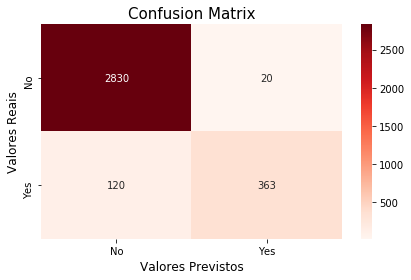

In [309]:
# chamada da função passando os dados, o modelo, o tipo de normalização e o grid de parâmetros.

modelo_XGB = XGBClassifier()
escala = MinMaxScaler()
b_params_XGB = pipe_avalia(df_x_treino, y_treino, modelo_XGB, escala, paramGrid_XGB)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse cojunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [322]:
b_params_XGB

{'Model__colsample_bytree': 1,
 'Model__learning_rate': 0.025,
 'Model__max_delta_step': 1,
 'Model__max_depth': 5,
 'Model__n_estimators': 400,
 'Model__subsample': 1}

**Dados Selecionados - Feature Selection**

Aplicando nosso conjunto de dados selecionado ao modelo XGBoost.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 38.6min finished



Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2850
           1       0.86      0.66      0.75       483

    accuracy                           0.94      3333
   macro avg       0.90      0.82      0.86      3333
weighted avg       0.93      0.94      0.93      3333






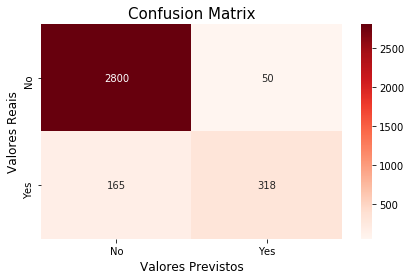

In [310]:
# chamada da função passando os dados, o modelo, o tipo de normalização e o grid de parâmetros.

modelo_XGBs = XGBClassifier()
escala = MinMaxScaler()
b_params_XGBs = pipe_avalia(
    df_x_treino_fs, y_treino, modelo_XGBs, escala, paramGrid_XGB
)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse conjunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [321]:
b_params_XGBs

{'Model__colsample_bytree': 0.95,
 'Model__learning_rate': 0.04,
 'Model__max_delta_step': 1,
 'Model__max_depth': 5,
 'Model__n_estimators': 400,
 'Model__subsample': 1}


O classification report nos mostra as métricas para cada uma das classes.
Observamos que o modelo apresenta resultados piores para a classe 'Yes', representada pela classe '1'. Resultado totalmente esperado, uma vez que temos muito menos amostras dessa classe no nosso conjuto de dados, dificultando o "aprendizado" do modelo.

#### **6.3.1.2 Gradient Boosting Classifier**

Vamos definir o grid de parâmetros para o modelo Gradient Boosting Classifier.  
O grid traz várias opções de valores para alguns parâmetros do modelo, e o GridSearchCV testa todas as combinações possíveis entre os valores do grid, selecionando a melhor combinação entre todas.

In [306]:
paramGrid_GB = {
    "Model__learning_rate": [0.05, 0.01, 0.001],
    "Model__max_depth": [4, 5, 6],
    "Model__min_samples_leaf": [3, 4, 5],
    "Model__subsample": [0.5, 0.7, 1],
    "Model__n_estimators": [400, 700, 1000, 2000],
}

**Dados Completos**

Aplicando nosso conjunto de dados scompleto ao modelo Gradient Boosting Classifier.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 80.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 109.4min finished



Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2850
           1       0.94      0.76      0.84       483

    accuracy                           0.96      3333
   macro avg       0.95      0.88      0.91      3333
weighted avg       0.96      0.96      0.96      3333






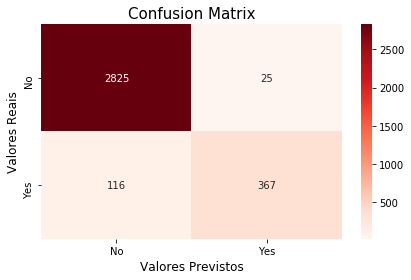

In [311]:
# chamada da função passando os dados, o modelo, o tipo de normalização e o grid de parâmetros.

modelo_GB = GradientBoostingClassifier()
escala = MinMaxScaler()
b_params_GB = pipe_avalia(df_x_treino, y_treino, modelo_GB, escala, paramGrid_GB)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse conjunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [320]:
b_params_GB

{'Model__learning_rate': 0.05,
 'Model__max_depth': 5,
 'Model__min_samples_leaf': 3,
 'Model__n_estimators': 2000,
 'Model__subsample': 0.7}

**Dados Selecionados - Feature Selection**

Aplicando nosso conjunto de dados selecionado ao modelo Gradient Boosting Classifier.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 65.4min finished



Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2850
           1       0.87      0.66      0.75       483

    accuracy                           0.94      3333
   macro avg       0.91      0.82      0.86      3333
weighted avg       0.93      0.94      0.93      3333






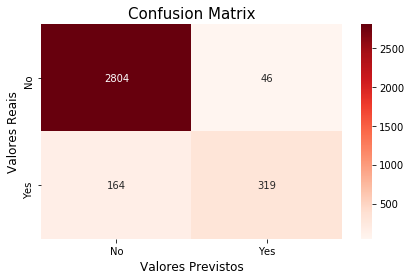

In [312]:
# chamada da função passando os dados, o modelo, o tipo de normalização e o grid de parâmetros.

modelo_GBs = GradientBoostingClassifier()
escala = MinMaxScaler()
b_params_GBs = pipe_avalia(df_x_treino_fs, y_treino, modelo_GBs, escala, paramGrid_GB)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse conjunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [323]:
b_params_GBs

{'Model__learning_rate': 0.01,
 'Model__max_depth': 6,
 'Model__min_samples_leaf': 4,
 'Model__n_estimators': 400,
 'Model__subsample': 0.5}

#### **6.3.1.3 Random Forest Classifier**

Vamos definir o grid de parâmetros para o modelo Random Forest Classifier.  
O grid traz várias opções de valores para alguns parâmetros do modelo, e o GridSearchCV testa todas as combinações possíveis entre os valores do grid, selecionando a melhor combinação entre todas.

In [308]:
paramGrid_RF = {
    "Model__n_estimators": [700, 1000, 2000],
    "Model__max_depth": [4, 5, 6],
    "Model__max_features": ["sqrt", "log2"],
    "Model__min_samples_leaf": [1, 3, 5],
    "Model__bootstrap": [True, False],
    "Model__criterion": ["gini", "entropy"],
    "Model__min_samples_split": [2, 3, 5],
    "Model__class_weight": ["balanced_subsample"],
}

**Dados Completos**

Aplicando nosso conjunto de dados completo ao modelo Random Forest Classifier.

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 83.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 107.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 139.0min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 141.2min finished



Classification Report

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2850
           1       0.67      0.82      0.74       483

    accuracy                           0.92      3333
   macro avg       0.82      0.87      0.84      3333
weighted avg       0.92      0.92      0.92      3333






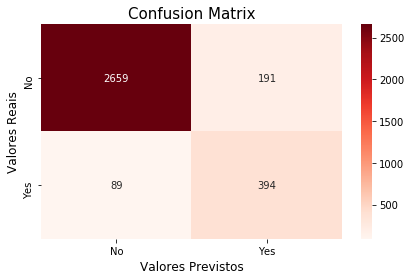

In [313]:
# chamada da função passando os dados, o modelo, o tipo de normalização e o grid de parâmetros.

modelo_RF = RandomForestClassifier()
escala = MinMaxScaler()
b_params_RF = pipe_avalia(df_x_treino, y_treino, modelo_RF, escala, paramGrid_RF)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse conjunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [324]:
b_params_RF

{'Model__bootstrap': True,
 'Model__class_weight': 'balanced_subsample',
 'Model__criterion': 'entropy',
 'Model__max_depth': 6,
 'Model__max_features': 'log2',
 'Model__min_samples_leaf': 1,
 'Model__min_samples_split': 2,
 'Model__n_estimators': 700}

**Dados Selecionados - Feature Selection**

Aplicando nosso conjunto de dados selecionados ao modelo Random Forest Classifier.

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 54.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 78.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 99.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 125.6min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 127.4min finished



Classification Report

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2850
           1       0.58      0.79      0.67       483

    accuracy                           0.89      3333
   macro avg       0.77      0.85      0.80      3333
weighted avg       0.91      0.89      0.89      3333






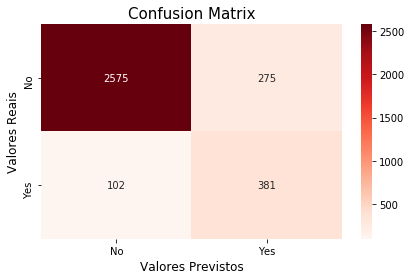

In [314]:
modelo_RFs = RandomForestClassifier()
escala = MinMaxScaler()
b_params_RFs = pipe_avalia(df_x_treino_fs, y_treino, modelo_RFs, escala, paramGrid_RF)

O retorno da função nos traz todos os resultados para avaliarmos o modelo.

Para esse conjunto de dados, dentre os valores do grid, os melhores valores selecionados para treinar o modelo foram:

In [325]:
b_params_RF

{'Model__bootstrap': True,
 'Model__class_weight': 'balanced_subsample',
 'Model__criterion': 'entropy',
 'Model__max_depth': 6,
 'Model__max_features': 'log2',
 'Model__min_samples_leaf': 1,
 'Model__min_samples_split': 2,
 'Model__n_estimators': 700}

#### **6.3.1.4 Avaliando os Resultados**

Temos os resultados então da avaliação de três modelos, utilizando dois conjuntos de dados diferentes.

Nossa primeira conclusão está na resposta dos modelos aos diferentes conjuntos de dados.  
É evidente uma piora dos resultados com os conjuto de dados selecionados, composto pelas variáveis preditoras apontadas como mais relevantes.
Partindo desse ponto, já descartamos o conjunto de dados selecionados e optamos por utilizar os dados completos.

Agora vamos analisar os resultados das métricas dos três modelos para o conjunto de dados completo.  

Como discutimos anteriormente, as métricas ideais para o nosso problema de negócio são o Precision e o Recall.  
Mas por qual delas devemos optar? De acordo com o nosso problema de negócios devemos definir o que é mais importante.  
Temos um Trade-off entre as duas escolhas, ao passo que ao priorizarmos uma opção, estaremos penalizando a outra.  
Portanto, qual o objetivo principal? Identificarmos o maior número possível de clientes que podem vir a efetuar o Churn? Ao passo que essa escolha levaria o modelo a classificar clientes que não tenham a intenção de cancelar os serviços, como clientes que o fariam.  
Ou a proridade é ser acertivo na classificação do cliente como sendo um caso positivo de Churn, mas com o ônus de não conseguir identificar todos os positivos, levando a uma possível perda desses clientes que não foram identificados.

Para ficar mais claro, vamos considerar um exemplo de **100 clientes**, e considerando a taxa de Churn do nosso caso, **15 clientes** tendem a efetuar o Churn.  
Se o nosso modelo identificar como Churn positivo um total de 10 clientes, mas tendo errado a previsao de 2 deles, temos então que o nosso modelo acertou efetivamente 8 clientes que realmente tendem a efetuar o Churn. Isso nos dá um **Precision de 80%** para o modelo.  
Em contrapartida, sabendo que temos na realidade 15 clientes Churn positivos, e nosso modelo identificou apenas 8 deles, temos então um **Recall de 53%**. Como consequência, temos um total de 7 clientes que não foram identificados e que podem ser perdidos pela operadora.

Então, como conclusão, com o Recall baixo, deixamos de identificar clientes que podem ser perdidos. Com o Precision baixo, tendemos a identificar clientes falsos Churn positivos, levando a uma possível abordagem errônea.

Por escolha de negócio, vamos priorizar o **Recall** e buscar identificar o maior número possível de clientes Churn positivos reais, mas tentando não penalizar muito o Precision.

As métricas Precision e Recall são calculadas para classe em questão, e não para todo o conjunto de dados. Por isso essas métricas são ideias para o nosso problema, uma vez que temos interesse em uma das classes. Como nosso problema consiste em indentificar antecipadamente clientes que podem deixar a operadora, nosso foco está na classe positiva **Yes ('1')**.

Portanto, entre todos os nossos modelos, tivemos bons resultados para Precision, mas com o Recall razoáveis.
Como optamos por priorizarmos o Recall, vemos que o modelo Random Forest Classifier e Gradient Boosting Classifier apresentaram valores maiores de Recall para a classe positiva

Vamos portanto analisar com mais detalhes os resultados desses modelos.

##### **6.3.1.4.1 Random Forest Classifier**

Com algumas vizualizações de como se comportam as métricas, podemos entender melhor o modelo.

In [333]:
# Parâmetros selecionados para o modelo

b_params_RF

{'Model__bootstrap': True,
 'Model__class_weight': 'balanced_subsample',
 'Model__criterion': 'entropy',
 'Model__max_depth': 6,
 'Model__max_features': 'log2',
 'Model__min_samples_leaf': 1,
 'Model__min_samples_split': 2,
 'Model__n_estimators': 700}

In [801]:
# Realizando previsões com os melhores parametros do modelo. Função pipe_pred aplica a função cross_val_predict.

modelo_RF = RandomForestClassifier()
escala = MinMaxScaler()
y_pred_RF = pipe_pred(df_x_treino, y_treino, modelo_RF, escala, b_params_RF)

**Curvas Precision x Recall**

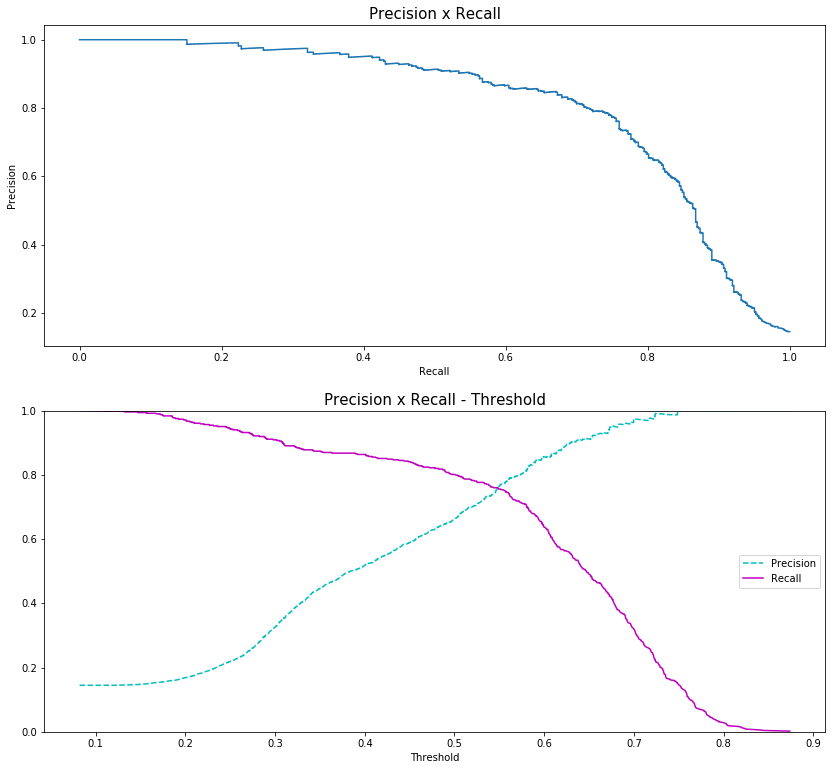

In [908]:
# Calculo das métricas

precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(
    y_true=y_treino, probas_pred=y_pred_RF
)

# Plot da curva Precision x Recall
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13))
PrecisionRecallDisplay(precision=precisions_RF, recall=recalls_RF).plot(ax=ax1)
ax1.set_title("Precision x Recall", fontsize=15)

# Plot das curvas precision x recall para cada threshold
plt.plot(thresholds_RF, precisions_RF[:-1], "c--", label="Precision")
plt.plot(thresholds_RF, recalls_RF[:-1], "m-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.ylim([0, 1])
plt.title("Precision x Recall - Threshold", fontsize=15)
plt.show()

O primeiro gráfico nos mostra a relação entre as métricas Precision x Recall, onde podemos visualizar como essas métricas variam entre si.  

No segundo gráfico,as curvas Precision x Recall para cada Threshold são traçadas a partir das **probabilidades de classe** calculadas pelo modelo.  
Por padrão, internamente o modelo classifica cada classe com o **Threshold** de **0.5**. Ou seja, se a probabilidade encontrada de que uma instância pertence a uma classe for maior que 0.5, ela é classificada como sendo daquela classe. Caso contrário, é classificada como sendo da outra classe.

Se observarmos as curvas de Precision e Recall vemos que o modelo **Random Forest Classifier** quando prioriza uma métrica, penaliza a outra. Se buscamos por um Recall alto, teríamos um Precision baixíssimo. Para o caso das probabilidades, o threshold padrão é 0.5, onde o modelo oferece 82% de Recall e 67% de Precision, como vimos no Classification Report.

Se buscássemos então um Recall de **90%**, vejamos o quanto teríamos de Precision. Pelo gráfico notamos que próximo de um **Threshold de 0.3** temos um Recall alto.

In [912]:
y_treino_pred_recall_90 = y_pred_RF > 0.3

print(
    "\033[1m" + "Recall: {:.2f}".format(recall_score(y_treino, y_treino_pred_recall_90))
)
print(
    "\033[1m"
    + "Precision com Recall próximo a 90% : {:.2f}".format(
        precision_score(y_treino, y_treino_pred_recall_90)
    )
)

Recall: 0.91
Precision com Recall próximo a 90% : 0.33


Vemos então que o modelo não nos atende bem se quisermos um Recall alto, próximo de 90%.  

Se buscarmos o melhor ponto do modelo em que as métricas estão **equilibradas**, vejamos o quanto teríamos.  
Pelo gráfico observamos que esse ponto está próximo do **Threshold de 0.55**.

In [911]:
y_treino_pred_x = y_pred_RF > 0.55
print(
    "\033[1m"
    + "Precision próximo ao ponto de cruzamento: {:.2f}".format(
        precision_score(y_treino, y_treino_pred_x)
    )
)
print(
    "\033[1m"
    + "Recall próximo ao ponto de cruzamento: {:.2f}".format(
        recall_score(y_treino, y_treino_pred_x)
    )
)

Precision próximo ao ponto de cruzamento: 0.77
Recall próximo ao ponto de cruzamento: 0.76


##### **6.3.1.4.2 Gradient Boosting Classifier**

Com algumas vizualizações de como se comportam as métricas, podemos entender melhor o modelo.

In [551]:
# Melhores parâmetros para o modelo

b_params_GB

{'Model__learning_rate': 0.05,
 'Model__max_depth': 5,
 'Model__min_samples_leaf': 3,
 'Model__n_estimators': 2000,
 'Model__subsample': 0.7}

In [799]:
# Realizando previsões com os melhores parametros do modelo. Função pipe_pred aplica a função cross_val_predict.

modelo_GB = GradientBoostingClassifier()
escala = MinMaxScaler()
y_pred_GB = pipe_pred(
    df_x_treino,
    y_treino,
    modelo_GB,
    escala,
    b_params_GB,
)

**Curvas Precision x Recall**

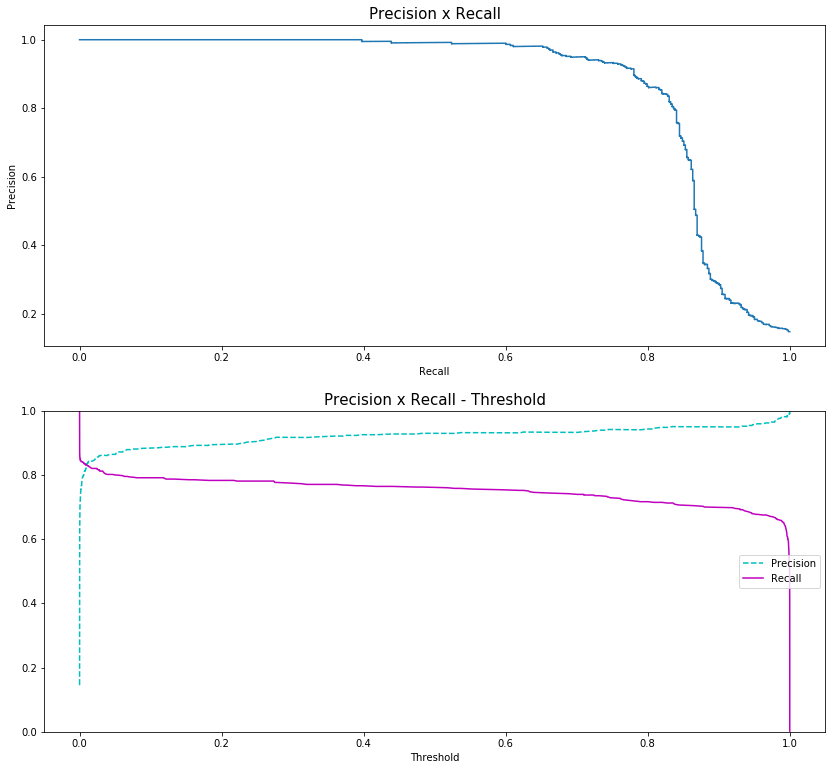

In [806]:
# Calculo das métricas

precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(
    y_true=y_treino, probas_pred=y_pred_GB
)

# Plot da curva Precision x Recall
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13))
PrecisionRecallDisplay(precision=precisions_GB, recall=recalls_GB).plot(ax=ax1)
ax1.set_title("Precision x Recall", fontsize=15)

# Plot das curvas Precision x Recall - Threshold
plt.plot(thresholds_GB, precisions_GB[:-1], "c--", label="Precision")
plt.plot(thresholds_GB, recalls_GB[:-1], "m-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.ylim([0, 1])
plt.title("Precision x Recall - Threshold", fontsize=15)
plt.show()

Diferentemente do modelo Random Forest, vemos que no modelo **Gradient Boosting Classifier** as métricas Precision e Recall se comportam melhor. Apesar de observarmos que os valores de Precision são melhores, vemos que esse modelos consegue manter bons níveis para ambas as métricas, sem penalizar muito uma ou outra. Pelas curvas percebemos que é possível alcançarmos valores altos de Recall, com bons níveis de Precision.

O ponto de **equilíbio** entre as métricas ocorre em valores baixos de **Threshold próximos de zero**. Vejamos um valor próximo:

In [910]:
y_treino_pred_x_GB = y_pred_GB > 0.01
print(
    "\033[1m"
    + "Precision próximo ao ponto de cruzamento: {:.2f}".format(
        precision_score(y_treino, y_treino_pred_x_GB)
    )
)
print(
    "\033[1m"
    + "Recall próximo ao ponto de cruzamento: {:.2f}".format(
        recall_score(y_treino, y_treino_pred_x_GB)
    )
)

Precision próximo ao ponto de cruzamento: 0.83
Recall próximo ao ponto de cruzamento: 0.83


Vemos então que o modelo tem bons resultados no ponto de equilíbrio entre as métricas, tendo um **Threshold de 0.1**.

Vamos verificar o comportamento se diminuirmos ainda mais o Threshold na tentativa de aumentarmos o Recall.

In [909]:
y_treino_pred_recall_ = y_pred_GB > 0.0005
print(
    "\033[1m"
    + "Precision: {:.2f}".format(precision_score(y_treino, y_treino_pred_recall_))
)
print(
    "\033[1m" + "Recall: {:.2f}".format(recall_score(y_treino, y_treino_pred_recall_))
)

Precision: 0.70
Recall: 0.85


Vemos nesse caso que mesmo diminuindo muito o Threshold, a melhora do Recall foi mínima e passou a penalizar muito o Precision. Comportamento notório ilustrado pelo gráfico, onde vemos a variação abrupta das métricas para os Thresholds próximos de zero.

Um **Threshold de 0.01** seria um resultado satisfatório para o modelo, pois manteria um bom equilíbrio entre as métricas, já que não seria possível atingir níveis de Recall acima de 90% sem penalizarmos muito o Precision.

**Comparando os Modelos**

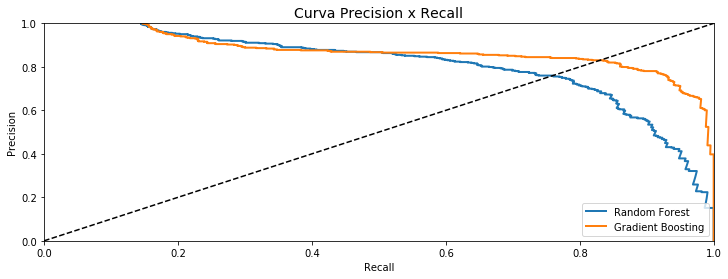

In [913]:
# Plot conjunto das curvas Precision x Recall de ambos modelos

fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(precisions_RF, recalls_RF, linewidth=2, label="Random Forest")
plt.plot(precisions_GB, recalls_GB, linewidth=2, label="Gradient Boosting")
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.title("Curva Precision x Recall", fontsize=14)
plt.show()

O plot conjunto das curvas Precision x Recall dos dois modelos confirma um melhor comportamento do modelo Gradient Boosting, onde vemos uma melhor estabilidade entre as métricas e maiores alcances de Recall mantendo altos valores de Precision.

Com todas as conclusões em mãos, optamos então pelo modelo **Gradient Boosting Classifier**.

## **6.4 Modelo final - Previsões com dados de Teste**

Agora que definimos qual o melhor modelo para o nosso problema de negócios, com melhores e parâmetros e threshold selecionados, podemos finalmente aplicar os dados de Teste ao nosso modelo final.

Os dados de teste já estão devidamente organizados e processados assim como fizemos com os dados de treino.

In [899]:
# Dataframe de Teste
df_teste

,state,area_code,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,11.0,2.0,0.0,0.0,101,0,70.9,123,211.9,73,236.0,73,10.6,3,3,0
1,26.0,2.0,0.0,0.0,137,0,223.6,86,244.8,139,94.2,81,9.5,7,0,0
2,35.0,0.0,0.0,1.0,103,29,294.7,95,237.3,105,300.3,127,13.7,6,1,0
3,32.0,1.0,0.0,0.0,99,0,216.8,123,126.4,88,220.6,82,15.7,2,1,0
4,40.0,1.0,0.0,0.0,108,0,197.4,78,124.0,101,204.5,107,7.7,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,11.0,0.0,0.0,1.0,50,40,235.7,127,223.0,126,297.5,116,9.9,5,2,0
1663,49.0,1.0,0.0,0.0,152,0,184.2,90,256.8,73,213.6,113,14.7,2,3,1
1664,7.0,1.0,0.0,0.0,61,0,140.6,89,172.8,128,212.4,97,13.6,4,1,0
1665,7.0,2.0,0.0,0.0,109,0,188.8,67,171.7,92,224.4,89,8.5,6,0,0


In [900]:
# Separando a variável Target
df_x_teste, y_teste = separa_target(df_teste)

**Modelo Final - Gradient Boosting Classifier**

Vamos finalmente aplicar os dados de teste aos modelo Gradient Boosting Classifier.

Registrando os hiperparâmetros utilizados:

In [890]:
b_params_GB

{'Model__learning_rate': 0.05,
 'Model__max_depth': 5,
 'Model__min_samples_leaf': 3,
 'Model__n_estimators': 2000,
 'Model__subsample': 0.7}

In [907]:
Scaler = ("scaler", MinMaxScaler())
model = ("Model", GradientBoostingClassifier())

pipe_final = Pipeline([scaler, model])

pipe_final.set_params(**b_params_GB)

pipe_final.fit(df_x_treino, y_treino)

y_pred_final = pipe_final.predict(df_x_teste)
y_prob_final = pipe_final.predict_proba(df_x_teste)

# Visualizando o resultado.
report = classification_report(y_teste, y_pred_final)

print("\n" + "\033[1m" + "Classification Report" + "\033[00m" + "\n", report)


Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1443
           1       0.96      0.71      0.82       224

    accuracy                           0.96      1667
   macro avg       0.96      0.85      0.90      1667
weighted avg       0.96      0.96      0.95      1667



Esses resultados para os dados de teste são os resultados utilizando o **Threshold** padrão de **0.5** que são definidos internamente pelo modelo.  
Como já analisamos e encontramos um melhor Threshold que nos atenda, podemos realizar uma nova classificação das probabilidades encontradas para cada classe, encontrando assim melhores resultados.

A partir das probabilidades calculadas pelo modelo, podemos comparar e classificar cada instância de acordo com o novo **Threshold de 0.1**.


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1443
           1       0.82      0.82      0.82       224

    accuracy                           0.95      1667
   macro avg       0.90      0.89      0.90      1667
weighted avg       0.95      0.95      0.95      1667



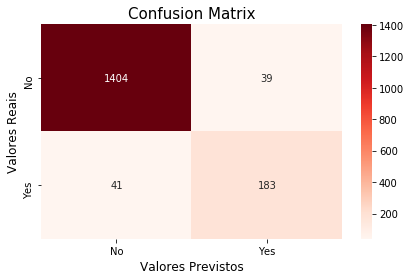

In [914]:
# Novo threshold

threshold = 0.01

# y_prob_final são as probabilidades para cada classe, calculadas pelo modelo Gradient Boosting

# Comparação e classificação de cada instância em 1 ou 0.
y_pred_threshold = [1 if x >= threshold else 0 for x in y_prob_final[:, 1]]

# Visualizando o classification report
report = classification_report(y_teste, y_pred_threshold)
print("\n" + "\033[1m" + "Classification Report" + "\033[00m" + "\n", report)


# Imprimindo a Confusion Matrix
plot_ConfusionMatrix(y_teste, y_pred_threshold)

Com o novo Threshold vemos que mantivemos bons resultados também para os dados de Teste.

**Salvando o Modelo**

In [916]:
# A função salva o pipeline criado com o modelo Gradient Boosting treinado com todos os hiperparâmetros selecionados.

salva_modelo(nome="GB_Classifier", modelo=pipe_final)

Modelo salvo!


### **6.4.1 Classificando Clientes**

Como aplicação do nosso modelo, podemos criar uma função para classificar cada cliente.

**Carregando o Modelo**

In [932]:
# Carrega o modelo treinado

classifica_churn = carrega_modelo(nome="GB_Classifier")

Modelo carregado!


**Classificando Clientes**

In [934]:
def churn_cliente(cliente, threshold=0.01):
    y_previsao = classifica_churn.predict_proba(cliente)

    y_threshold = y_previsao[:, 1] > threshold
    if threshold == True:
        print("\033[1m" + "Cliente propenso a efetuar o Churn!")
    else:
        print("\033[1m" + "Cliente não propenso a efetuar o Churn!")

Como não temos novos dados, vamos pegar uma instância do nosso dataset de Teste.

In [940]:
# seleciona um cliente aleatoriamente no dataset de Teste

ind = np.random.randint(0, len(y_teste))
cliente = df_x_teste.iloc[[ind]]

# chama a função para o cliente selecionado
churn_cliente(cliente)

Cliente não propenso a efetuar o Churn!


### **6.4.2 Conclusões**